In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib as mpl
import mplcatppuccin

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.style.use('latte')
pd.set_option('display.max_columns',None)
pd.set_option('styler.format.precision',3)

In [2]:
gamma = pd.read_csv('magic04.data', header=None)
gamma = gamma.rename(columns={
    0:'fLength',
    1:'fWidth',
    2:'fSize',
    3:'fConc',
    4:'fConc1',
    5:'fAsym',
    6:'fM3Long',
    7:'fM3Trans',
    8:'fAlpha',
    9:'fDist',
    10:'class'
})

gamma.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
gamma.isna().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [4]:
gamma.duplicated().sum()

115

In [5]:
gamma = gamma.drop_duplicates()

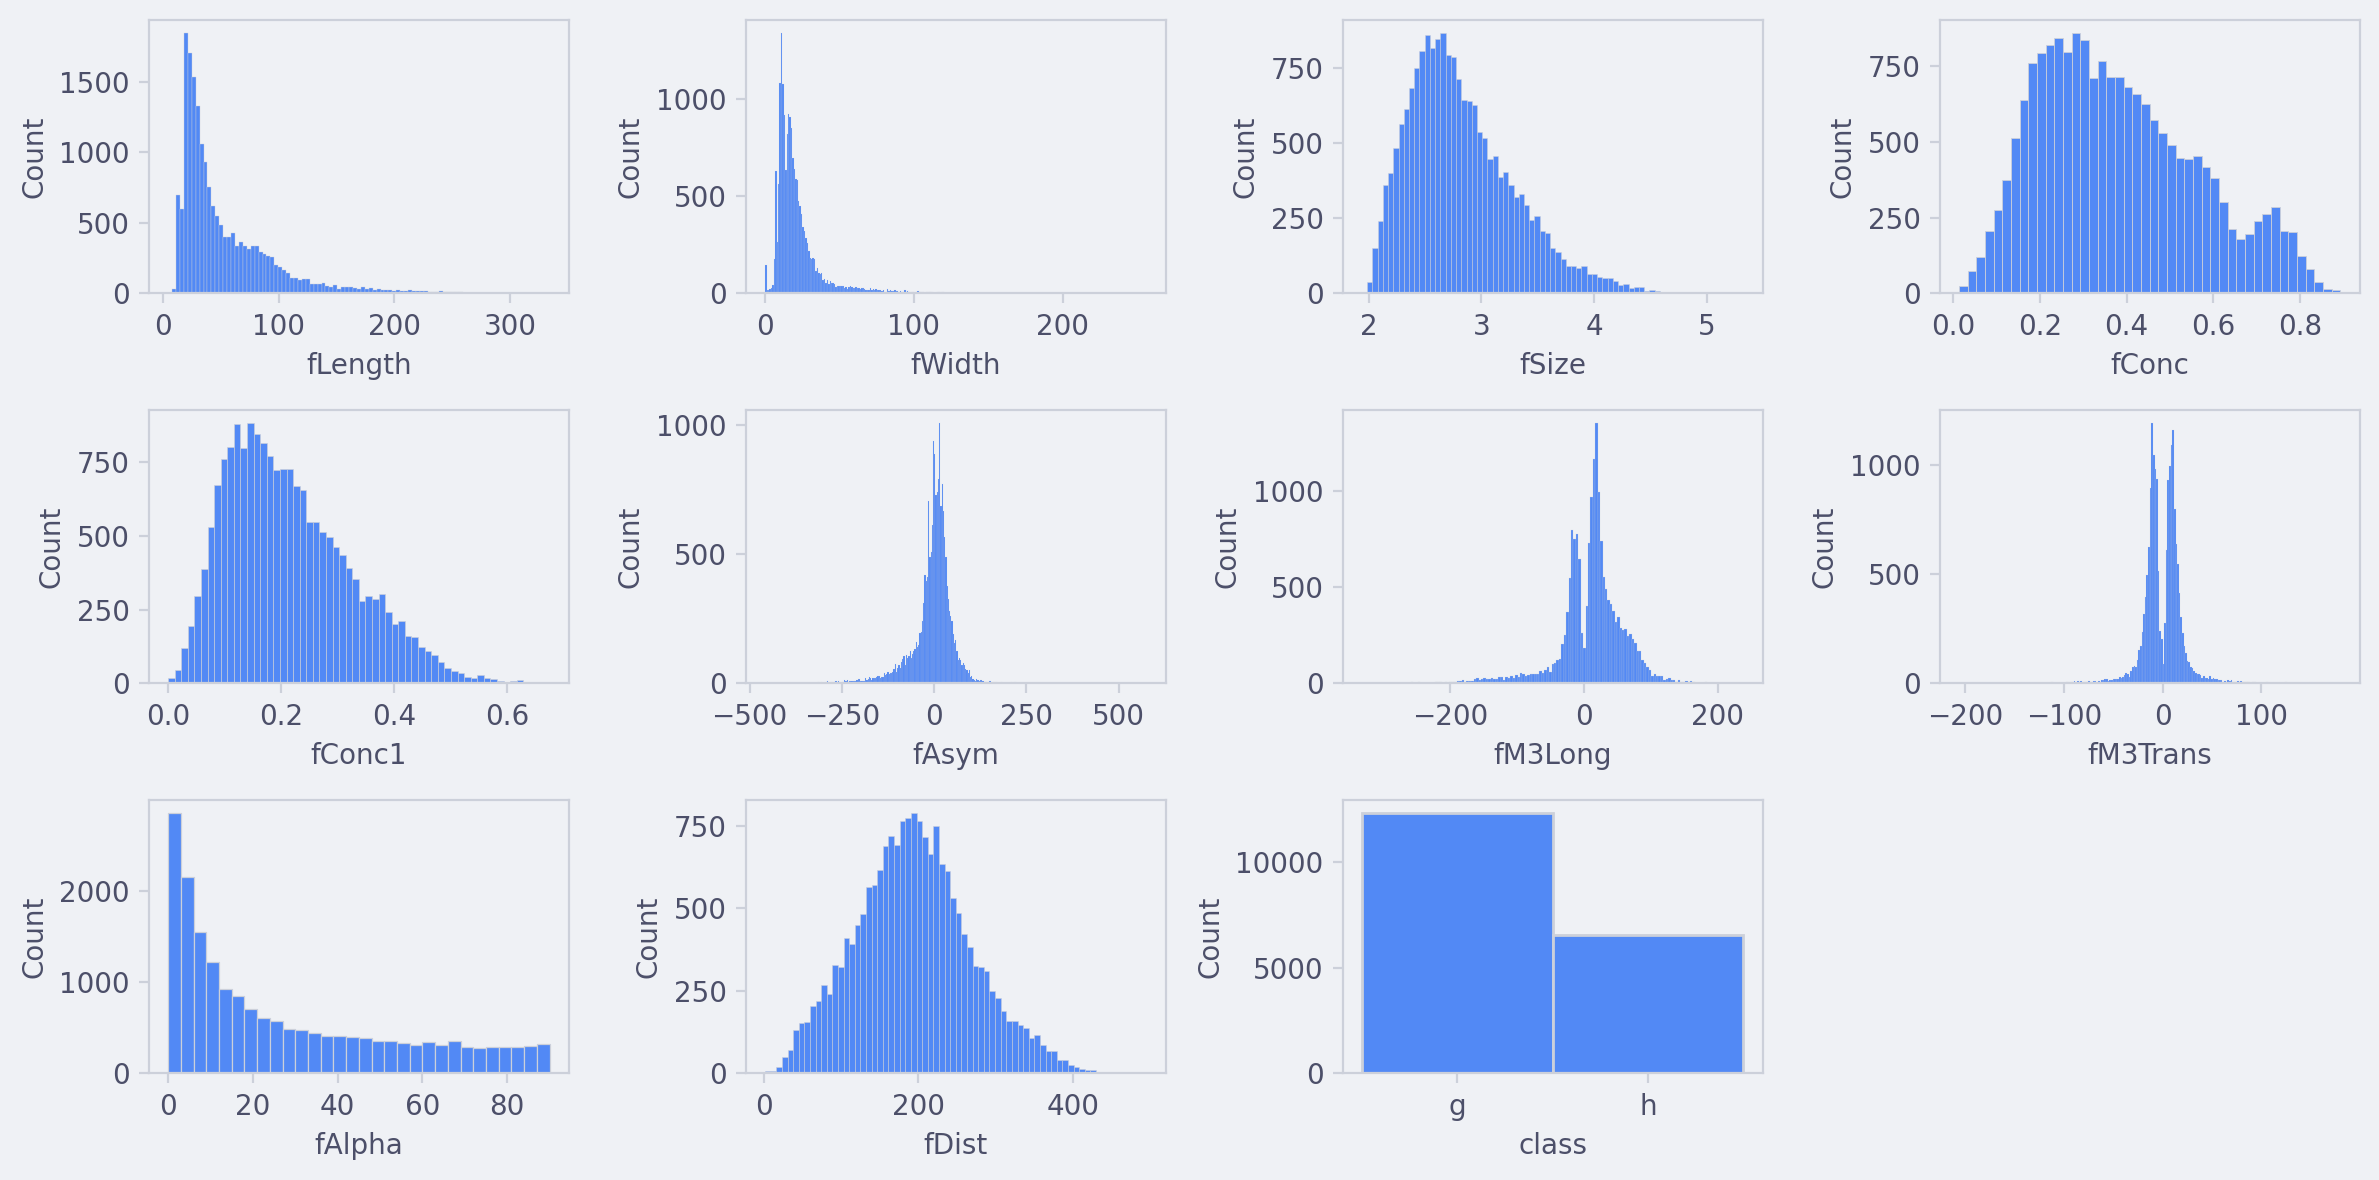

In [6]:
columns = gamma.columns.tolist()

nrows=3
ncols=4
plt.figure(figsize=(12,6))
for i, j in enumerate(columns):
    ax = plt.subplot(nrows,ncols,i+1)
    sns.histplot(x=gamma[j], ax=ax)

plt.tight_layout()

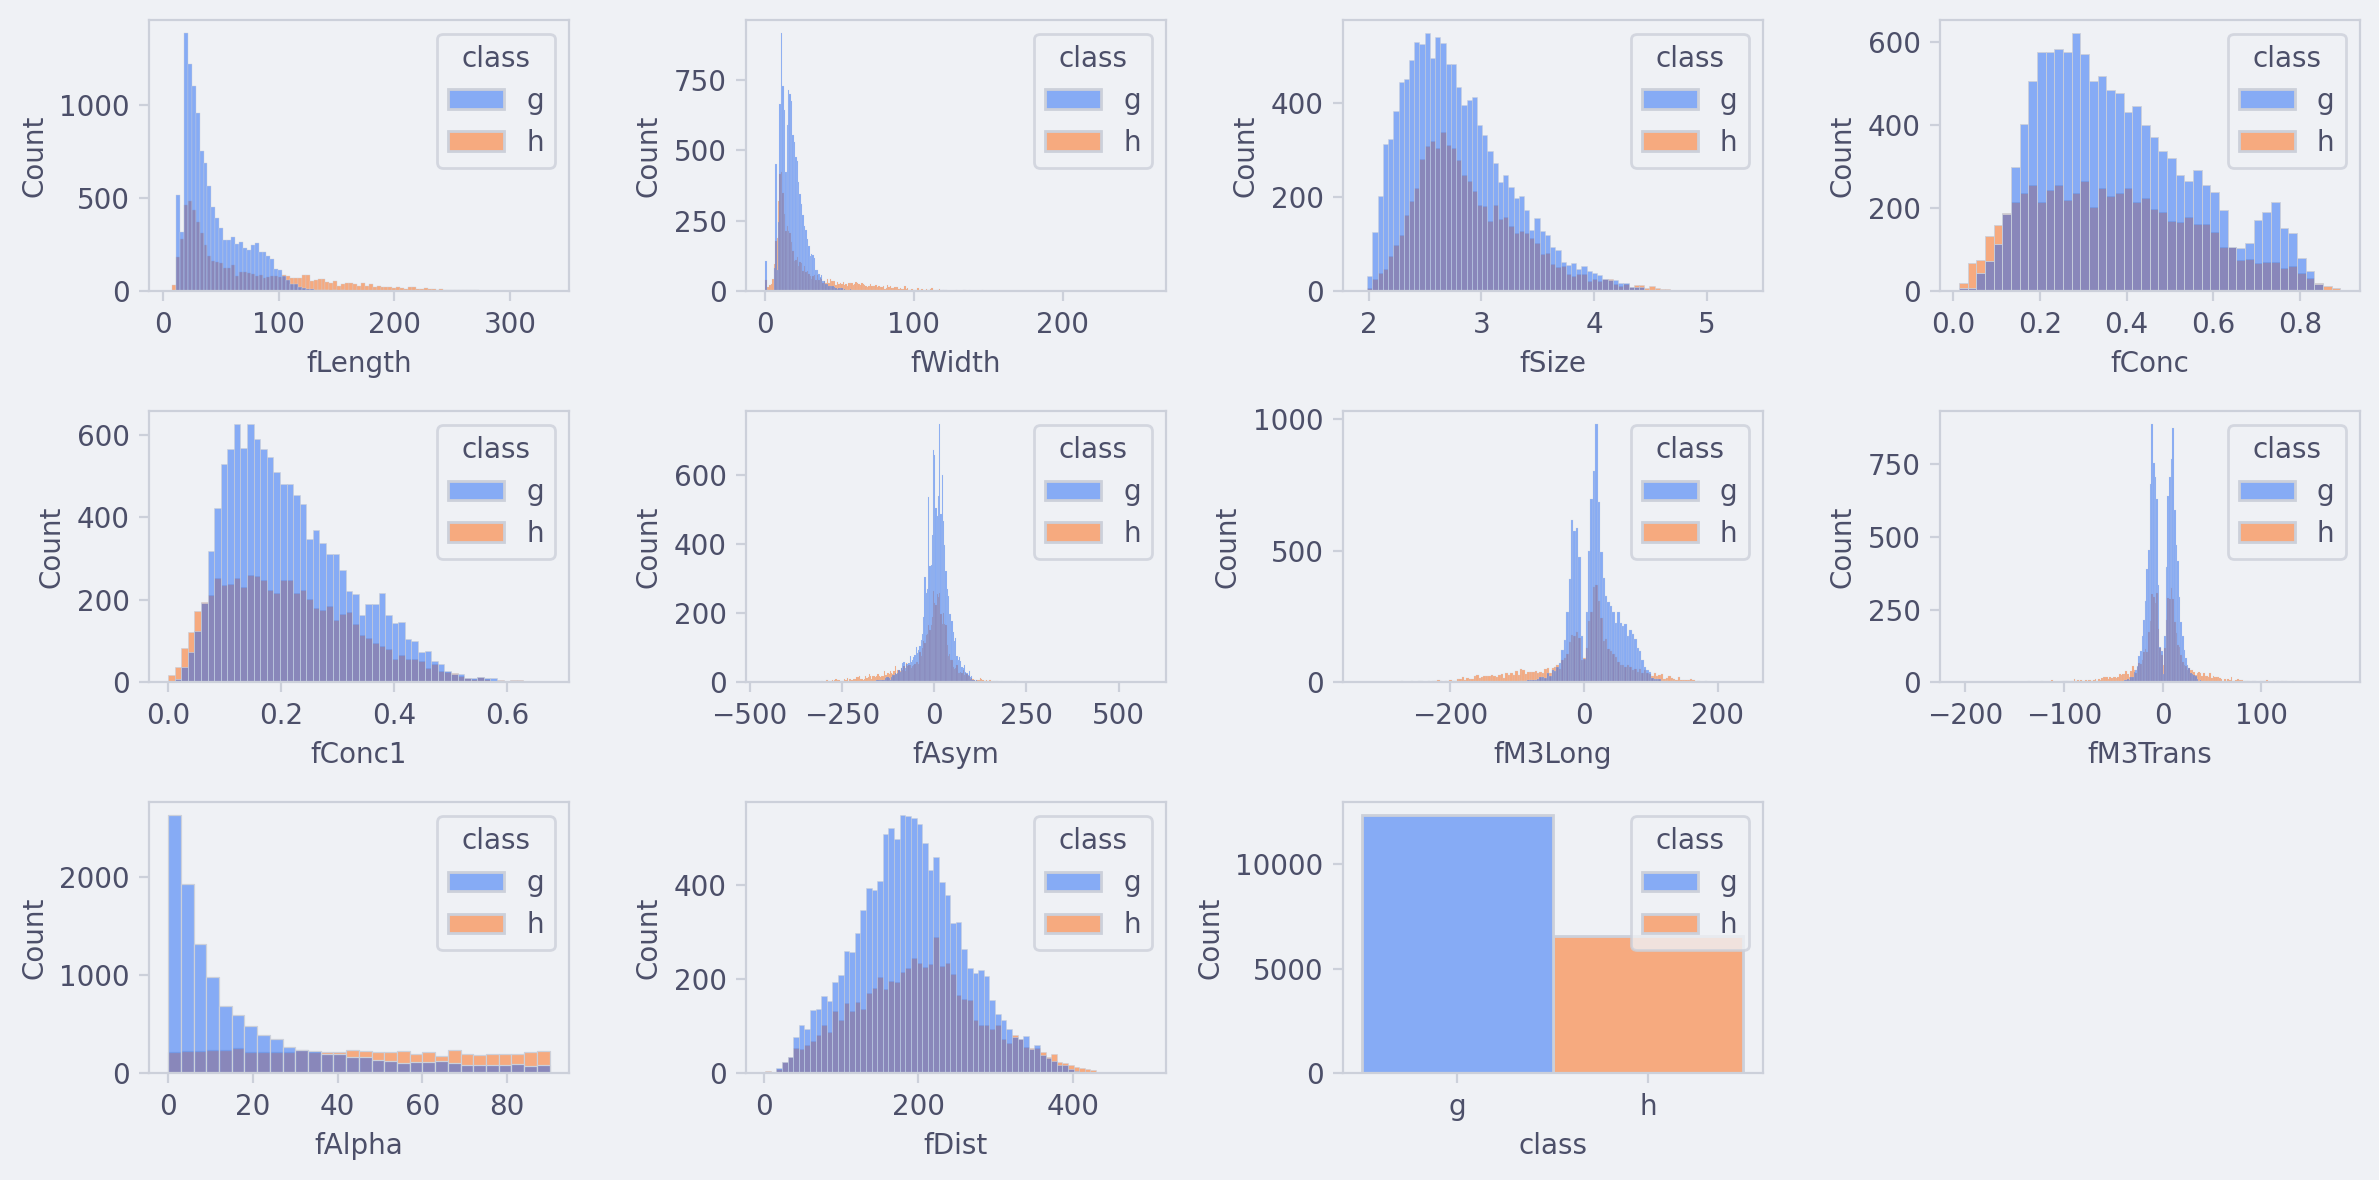

In [7]:
columns = gamma.columns.tolist()

nrows=3
ncols=4
plt.figure(figsize=(12,6))
for i, j in enumerate(columns):
    ax = plt.subplot(nrows,ncols,i+1)
    sns.histplot(x=gamma[j], hue=gamma['class'], ax=ax)

plt.tight_layout()

In [8]:
gamma.describe(exclude='object').T

count        mean        std       min       25%       50%   
fLength   18905.0   53.161416  42.259789    4.2835   24.3597   37.1295  \
fWidth    18905.0   22.145872  18.300664    0.0000   11.8742   17.1438   
fSize     18905.0    2.824643   0.472377    1.9413    2.4771    2.7400   
fConc     18905.0    0.380247   0.182709    0.0131    0.2358    0.3540   
fConc1    18905.0    0.214560   0.110384    0.0003    0.1285    0.1964   
fAsym     18905.0   -4.177867  59.010059 -457.9161  -20.4791    4.0629   
fM3Long   18905.0   10.618826  50.900687 -331.7800  -12.7693   15.3380   
fM3Trans  18905.0    0.259364  20.775268 -205.8947  -10.8358    0.7500   
fAlpha    18905.0   27.551644  26.083055    0.0000    5.5164   17.5330   
fDist     18905.0  193.712554  74.685712    1.2826  142.2690  191.8320   

               75%       max  
fLength    69.9754  334.1770  
fWidth     24.7124  256.3820  
fSize       3.1011    5.3233  
fConc       0.5035    0.8930  
fConc1      0.2850    0.6752  
fAsym      24.1335  575.2407  
fM3Long    35.8694  238.3210  
fM3Trans   10.9489  179.8510  
fAlpha     45.7040   90.0000  
fDist     240.4090  495.5610

In [9]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, PowerTransformer, QuantileTransformer
from sklearn.pipeline import Pipeline

log_transf = FunctionTransformer(func=np.log1p,
                                 inverse_func=np.expm1,
                                 check_inverse=False,
                                 feature_names_out='one-to-one')

std_scaler = StandardScaler()

pip_scaler = Pipeline(steps=[
    ('power', PowerTransformer()),
    ('std', std_scaler)
])

gamma_num = gamma.select_dtypes(exclude='object')
gamma_log = pd.DataFrame(data=log_transf.fit_transform(gamma_num), columns=gamma_num.columns)
gamma_scale = pd.DataFrame(data=std_scaler.fit_transform(gamma_num), columns=gamma_num.columns)

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log1p
  result = func(self.values, **kwargs)
/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


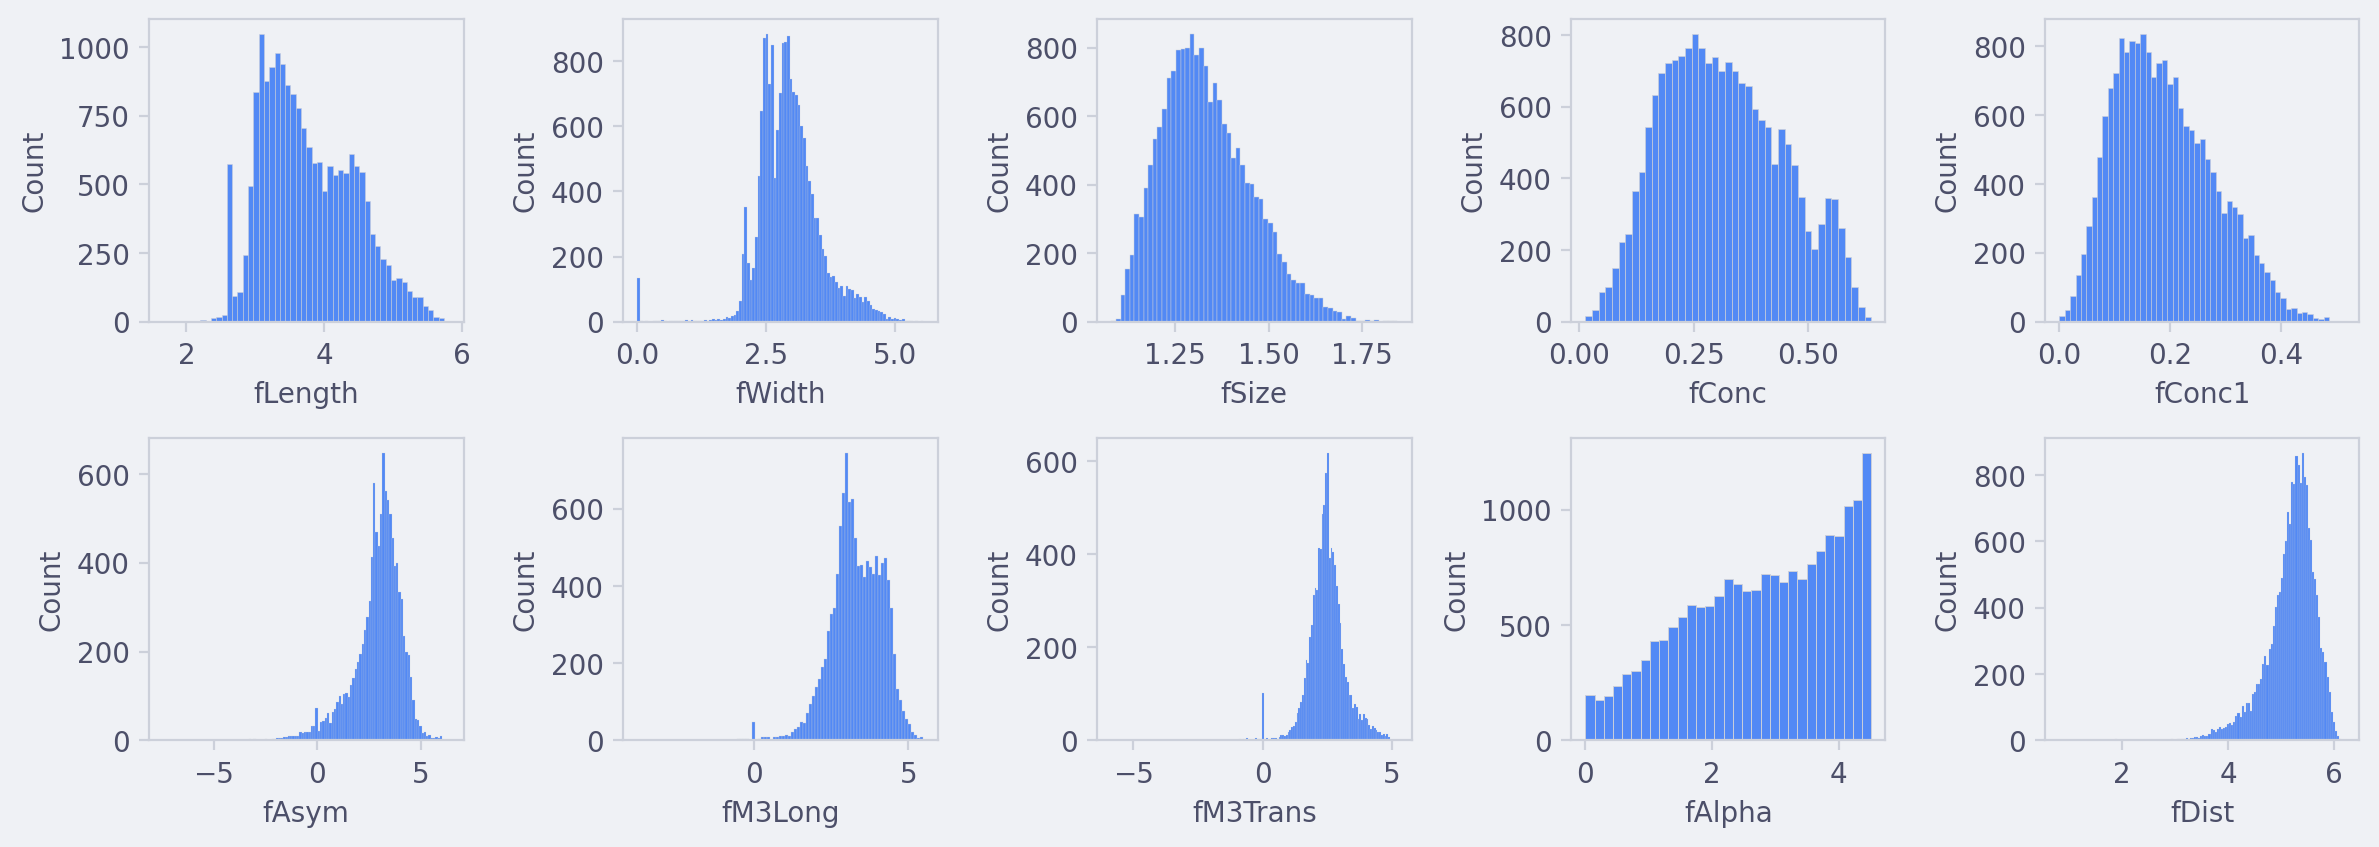

In [10]:
nrows=3
ncols=5
columns_transf = gamma_num.columns.to_list()
plt.figure(figsize=(12,6))
for i, j in enumerate(columns_transf):
    ax = plt.subplot(nrows,ncols,i+1)
    sns.histplot(x=gamma_log[j], ax=ax)

plt.tight_layout()

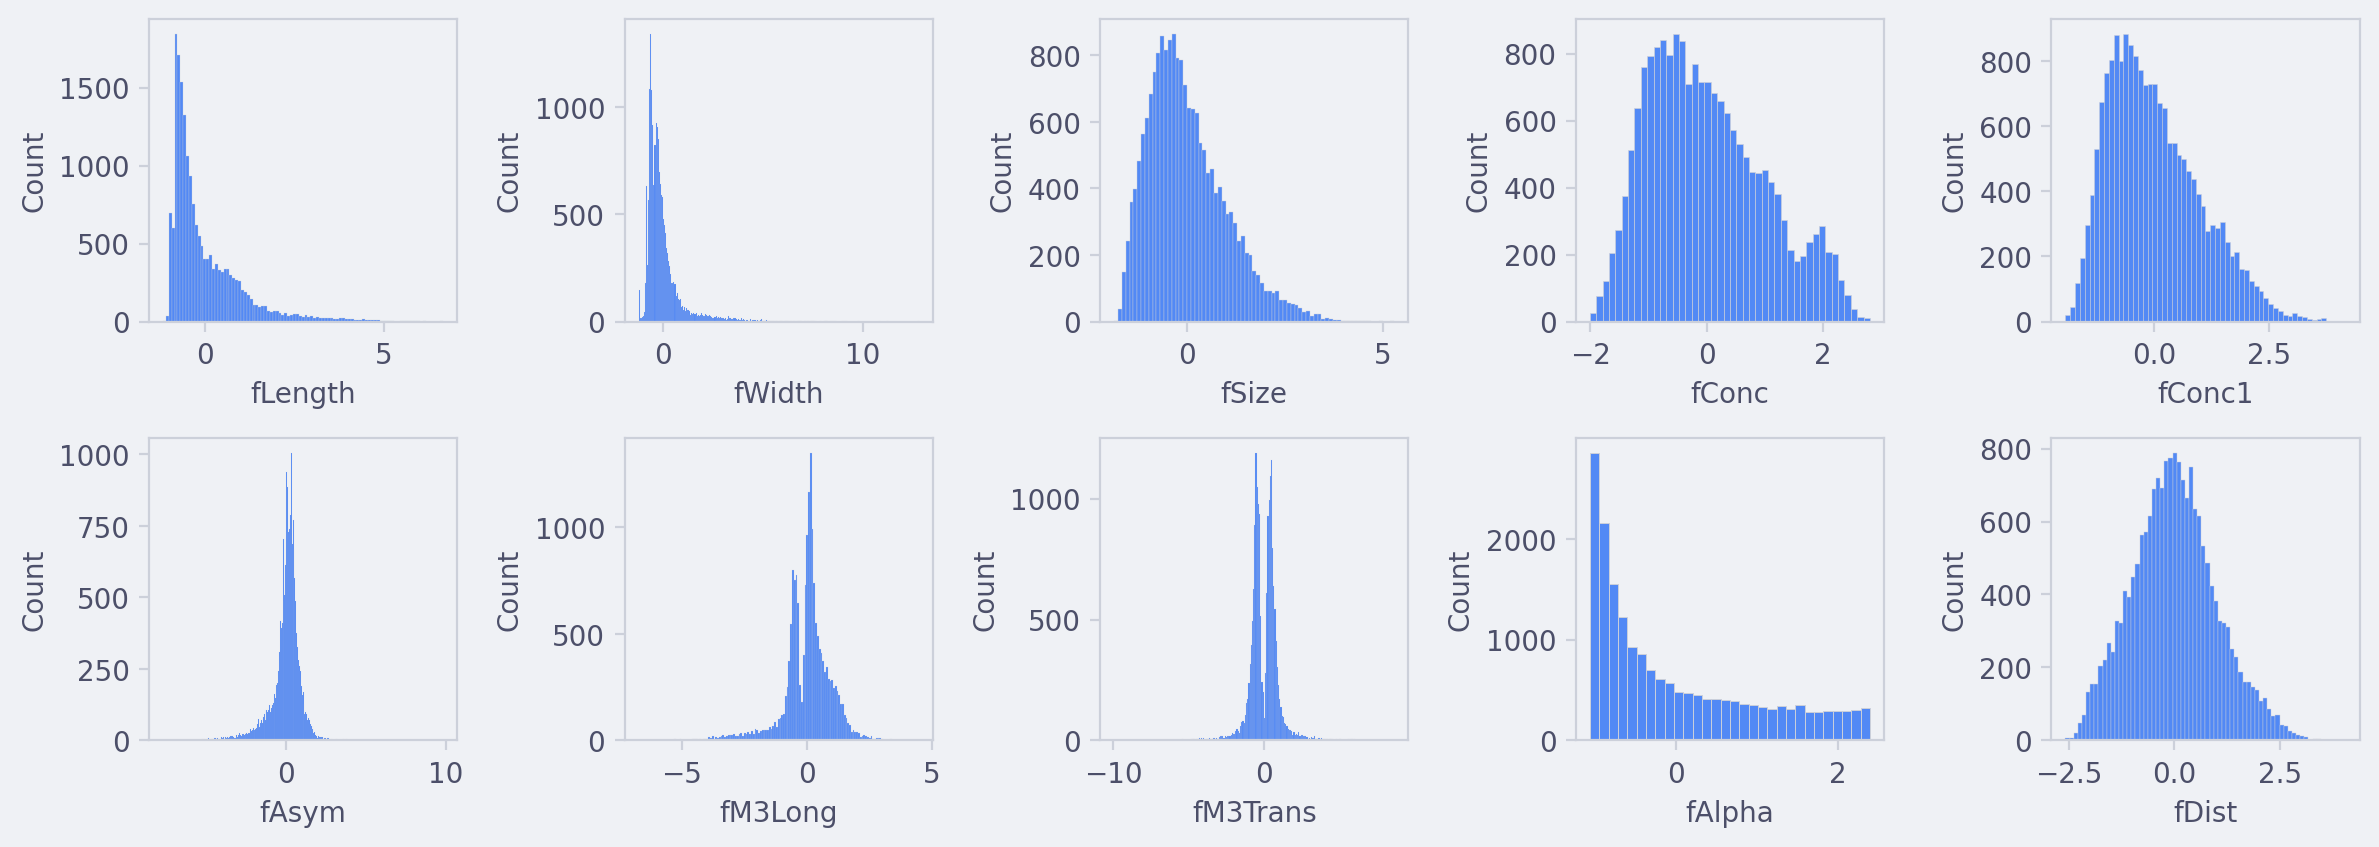

In [11]:
nrows=3
ncols=5
columns_transf = gamma_num.columns.to_list()
plt.figure(figsize=(12,6))
for i, j in enumerate(columns_transf):
    ax = plt.subplot(nrows,ncols,i+1)
    sns.histplot(x=gamma_scale[j], ax=ax)

plt.tight_layout()

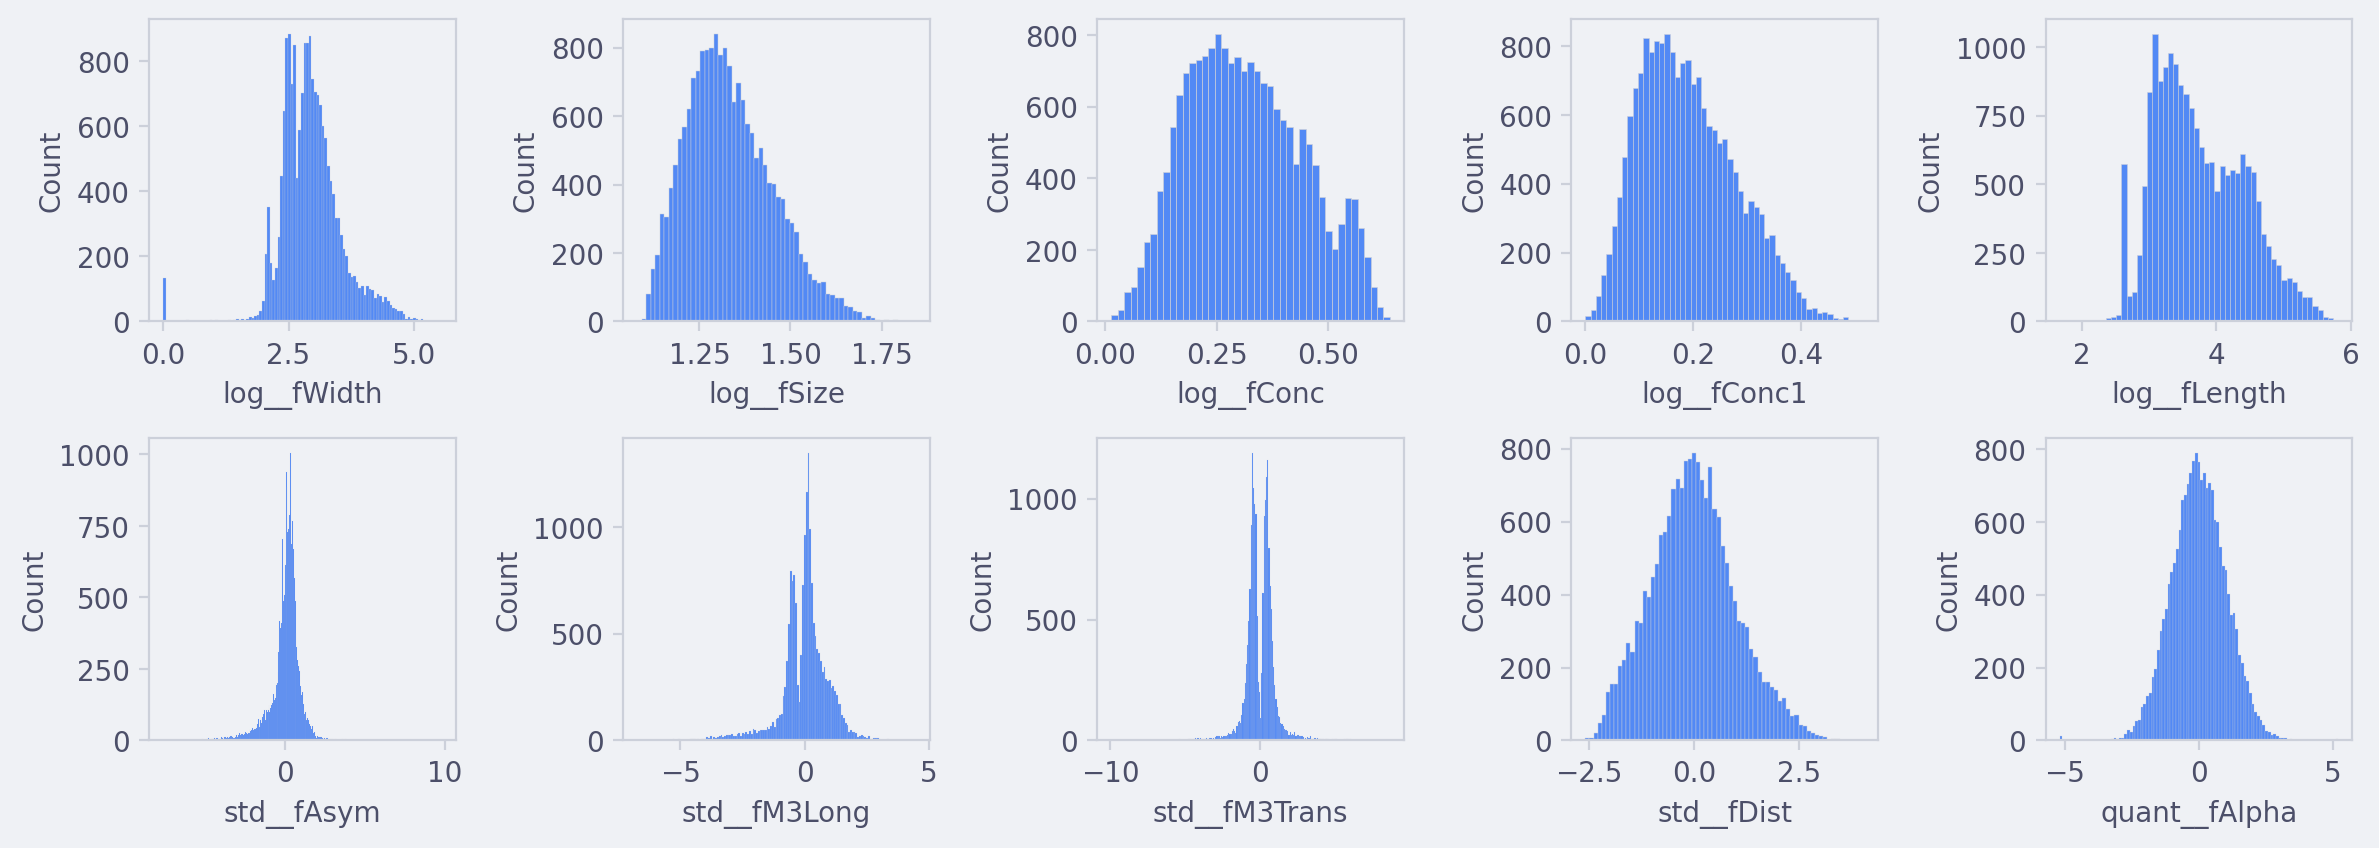

In [12]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('log', log_transf, ['fWidth', 'fSize', 'fConc', 'fConc1', 'fLength']),
    ('std', std_scaler, ['fAsym', 'fM3Long', 'fM3Trans', 'fDist']),
    ('quant', QuantileTransformer(output_distribution='normal'), ['fAlpha'])
])

gamma_new = pd.DataFrame(data=preprocessor.fit_transform(gamma_num), columns=preprocessor.get_feature_names_out())
nrows=3
ncols=5
columns_transf = gamma_new.columns.to_list()
plt.figure(figsize=(12,6))
for i, j in enumerate(columns_transf):
    ax = plt.subplot(nrows,ncols,i+1)
    sns.histplot(x=gamma_new[j], ax=ax)

plt.tight_layout()

<Axes: xlabel='class', ylabel='count'>

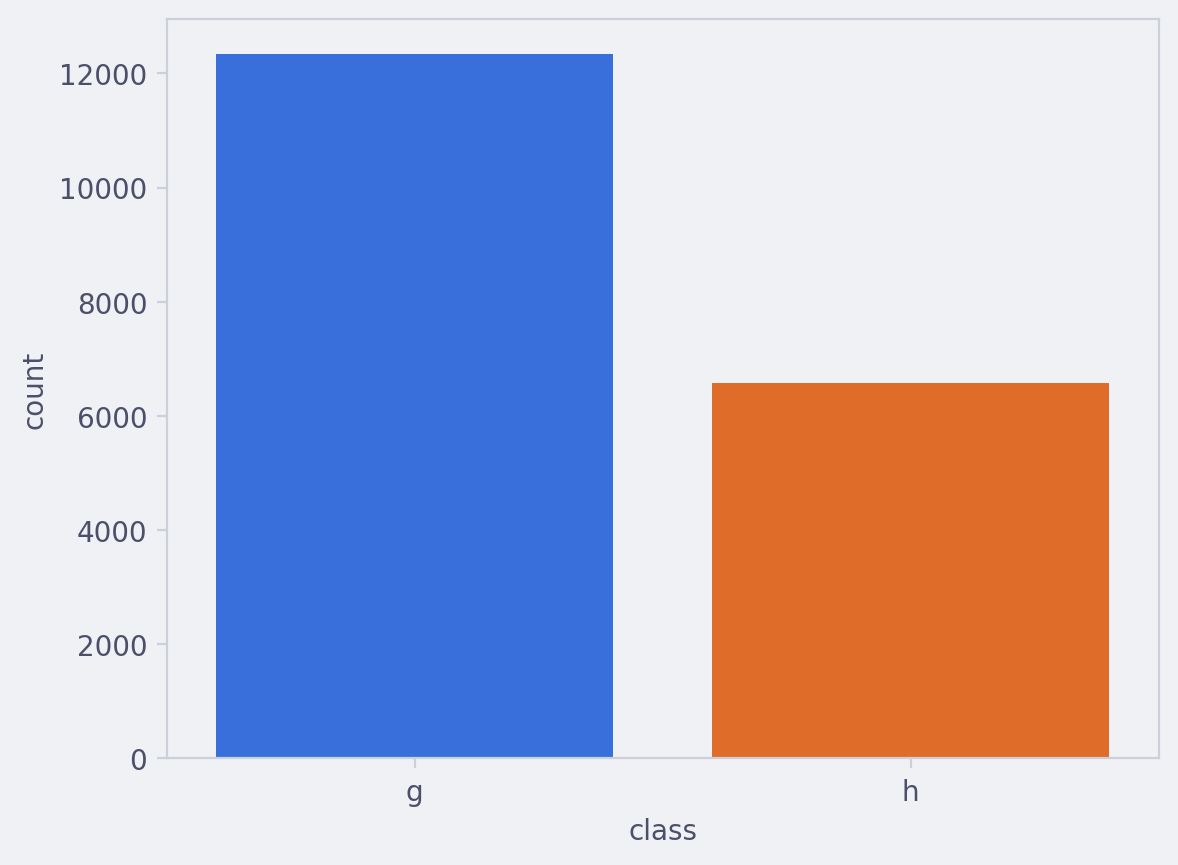

In [13]:
sns.countplot(data=gamma, x='class')

In [14]:
map = {'g':0, 'h':1}
gamma['class'] = gamma['class'].map(map)
gamma.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      0  
1   6.3609  205.2610      0  
2  76.9600  256.7880      0  
3  10.4490  116.7370      0  
4   4.6480  356.4620      0

In [15]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

train, test = train_test_split(gamma, train_size=0.95, stratify=gamma['class'])
print(train.shape)
print(test.shape)

(17959, 11)
(946, 11)


In [16]:
X = gamma.drop('class', axis=1)
y = gamma['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

X = train.drop('class', axis=1)
y = train['class']

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, stratify=y)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)


(16163, 10)
(1796, 10)
(946, 10)


In [17]:
def cross_val(model, cv=10, X=X_train, y=y_train):
    results = cross_validate(estimator=model,
                             X=X,
                             y=y,
                             cv=cv,
                             scoring=['f1', 'recall', 'precision', 'roc_auc'],
                             n_jobs=-1,
                             return_train_score=True)
    
    df = pd.DataFrame.from_dict(results, orient='columns')
    
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,7))

    df.plot(kind='line', y='train_f1', ax=axs[0,0], legend=True)
    df.plot(kind='line', y='test_f1', ax=axs[0,0], legend=True)

    df.plot(kind='line', y='train_recall', ax=axs[0,1], legend=True)
    df.plot(kind='line', y='test_recall', ax=axs[0,1], legend=True)

    df.plot(kind='line', y='train_precision', ax=axs[1,0], legend=True)
    df.plot(kind='line', y='test_precision', ax=axs[1,0], legend=True)

    df.plot(kind='line', y='train_roc_auc', ax=axs[1,1], legend=True)
    df.plot(kind='line', y='test_roc_auc', ax=axs[1,1], legend=True)

    
    axs[0,0].set_title('F1 Score')
    axs[0,1].set_title('Recall')
    axs[1,0].set_title('Precision')
    axs[1,1].set_title('ROC-AUC')


def plot_classifier_reports(model, classes=['g', 'h'], X_train=X_train, y_train=y_train, X_val=X_val, y_val=y_val):
    from yellowbrick.classifier import ROCAUC, ClassificationReport, ConfusionMatrix, PrecisionRecallCurve

    model.fit(X_train, y_train)

    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,12), tight_layout=True)
    vis_grid = [
        ROCAUC(estimator=model, classes=classes, ax=axs[0,0]),
        PrecisionRecallCurve(estimator=model, classes=classes, ax=axs[0,1]),
        ClassificationReport(estimator=model, classes=classes, ax=axs[1,0], cmap='PuBu', support=True),
        ConfusionMatrix(estimator=model, classes=classes, label_encoder={0:'g', 1:'h'},ax=axs[1,1], cmap='PuBu')
    ]

    for vis in vis_grid:
        vis.fit(X_train, y_train)
        vis.score(X_val, y_val)
        vis.finalize()

    plt.show()

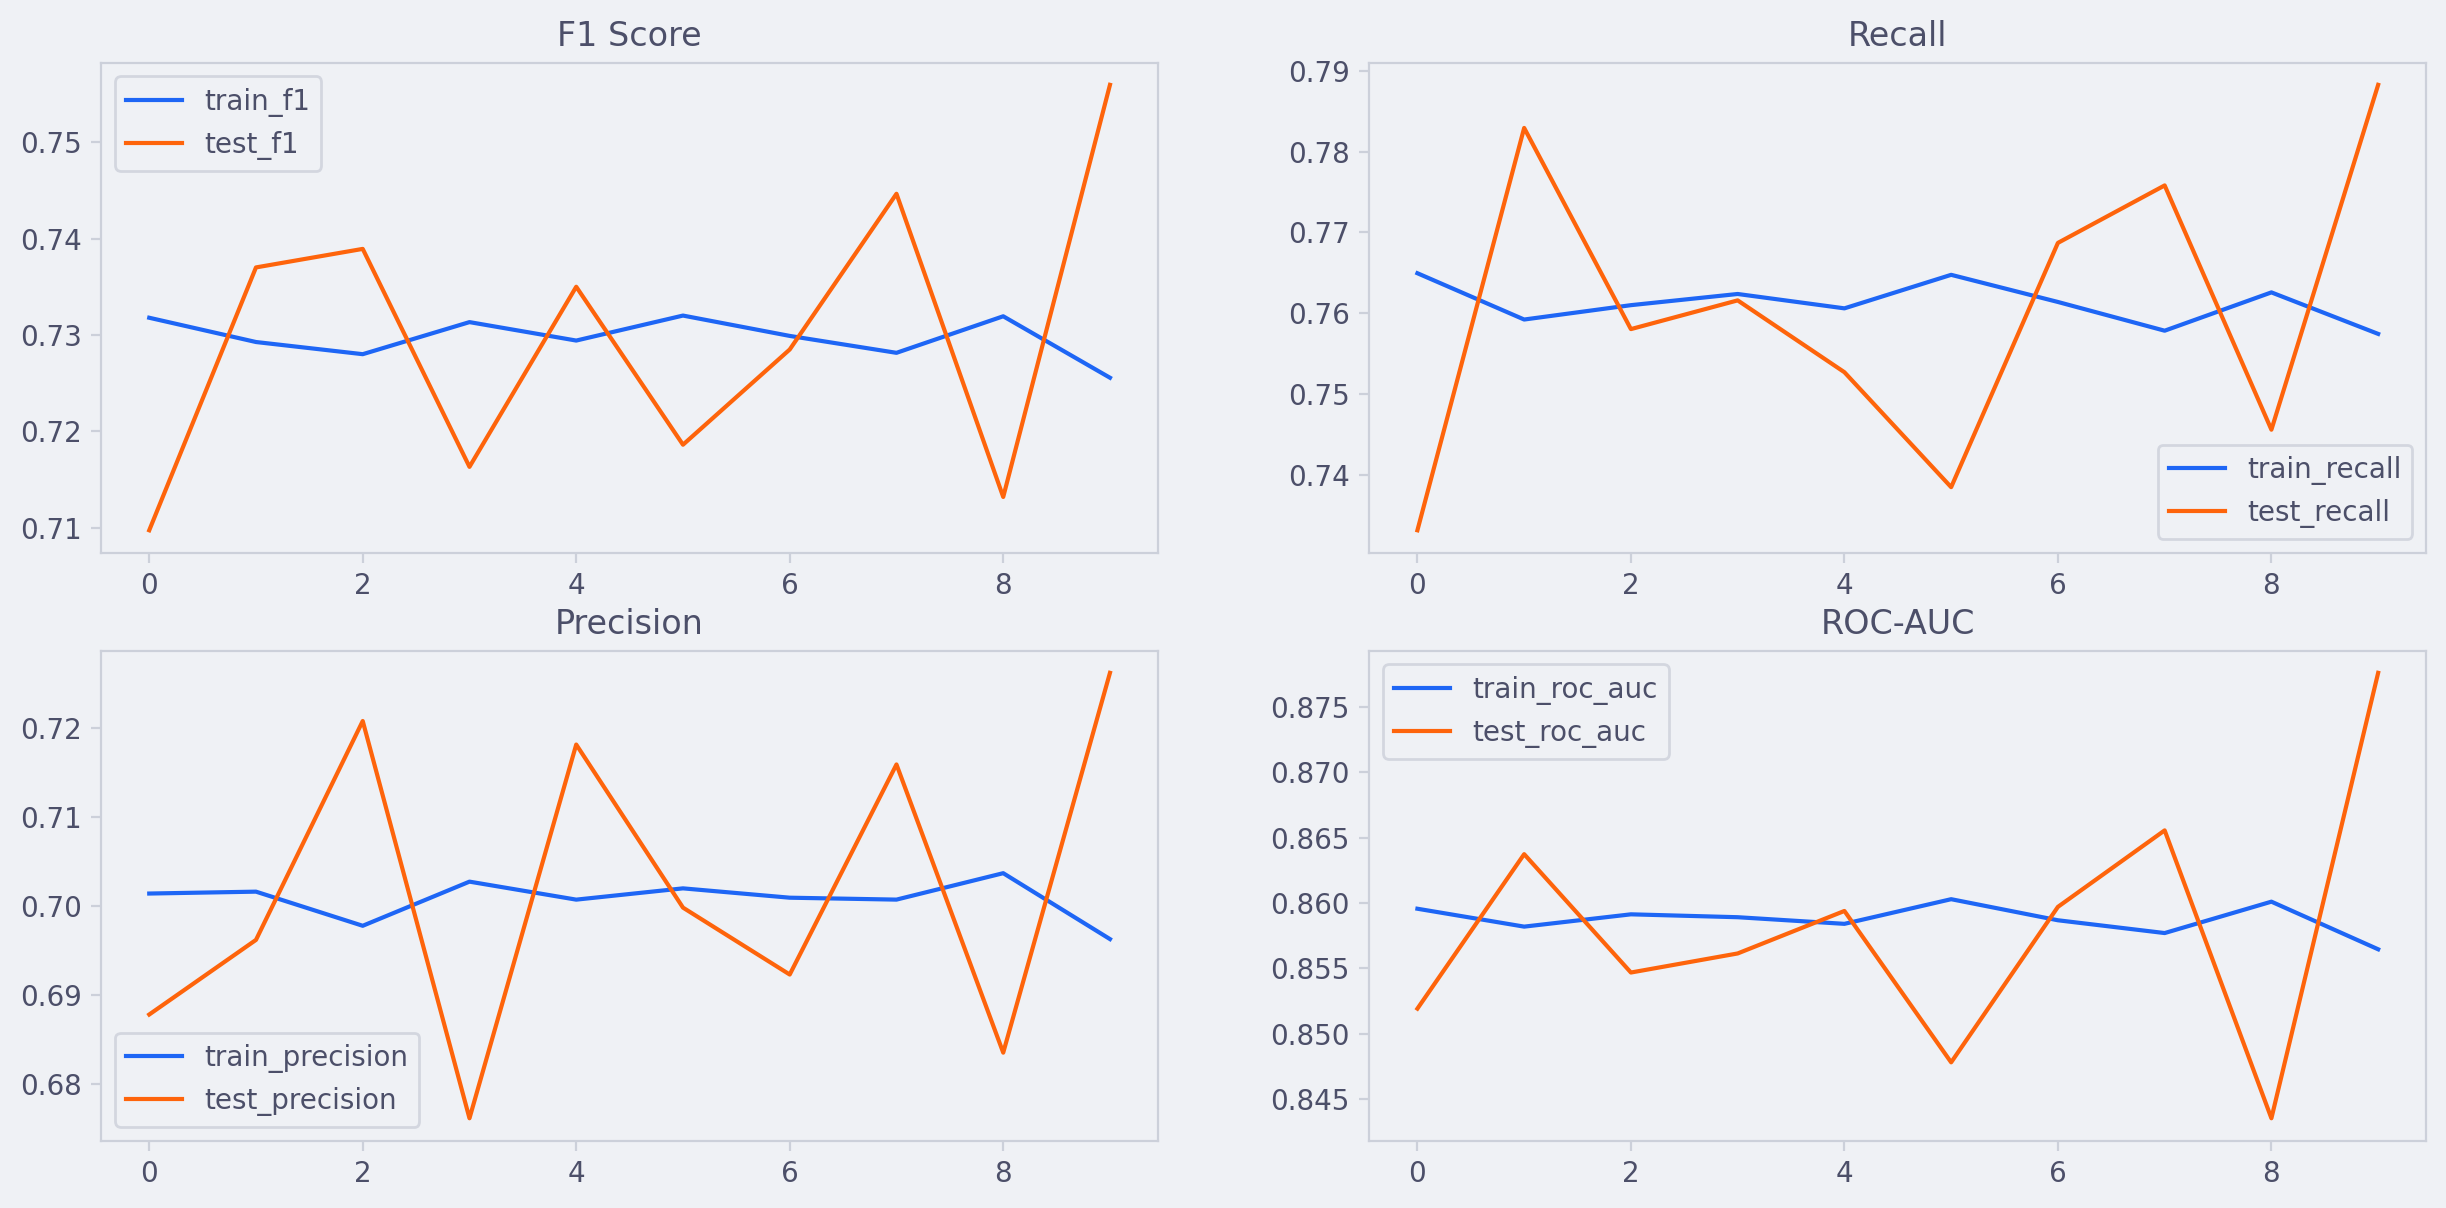

In [18]:
from sklearn.linear_model import LogisticRegression

log_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic', LogisticRegression(solver='saga', class_weight='balanced', max_iter=1000, n_jobs=-1))
])

cross_val(log_clf)

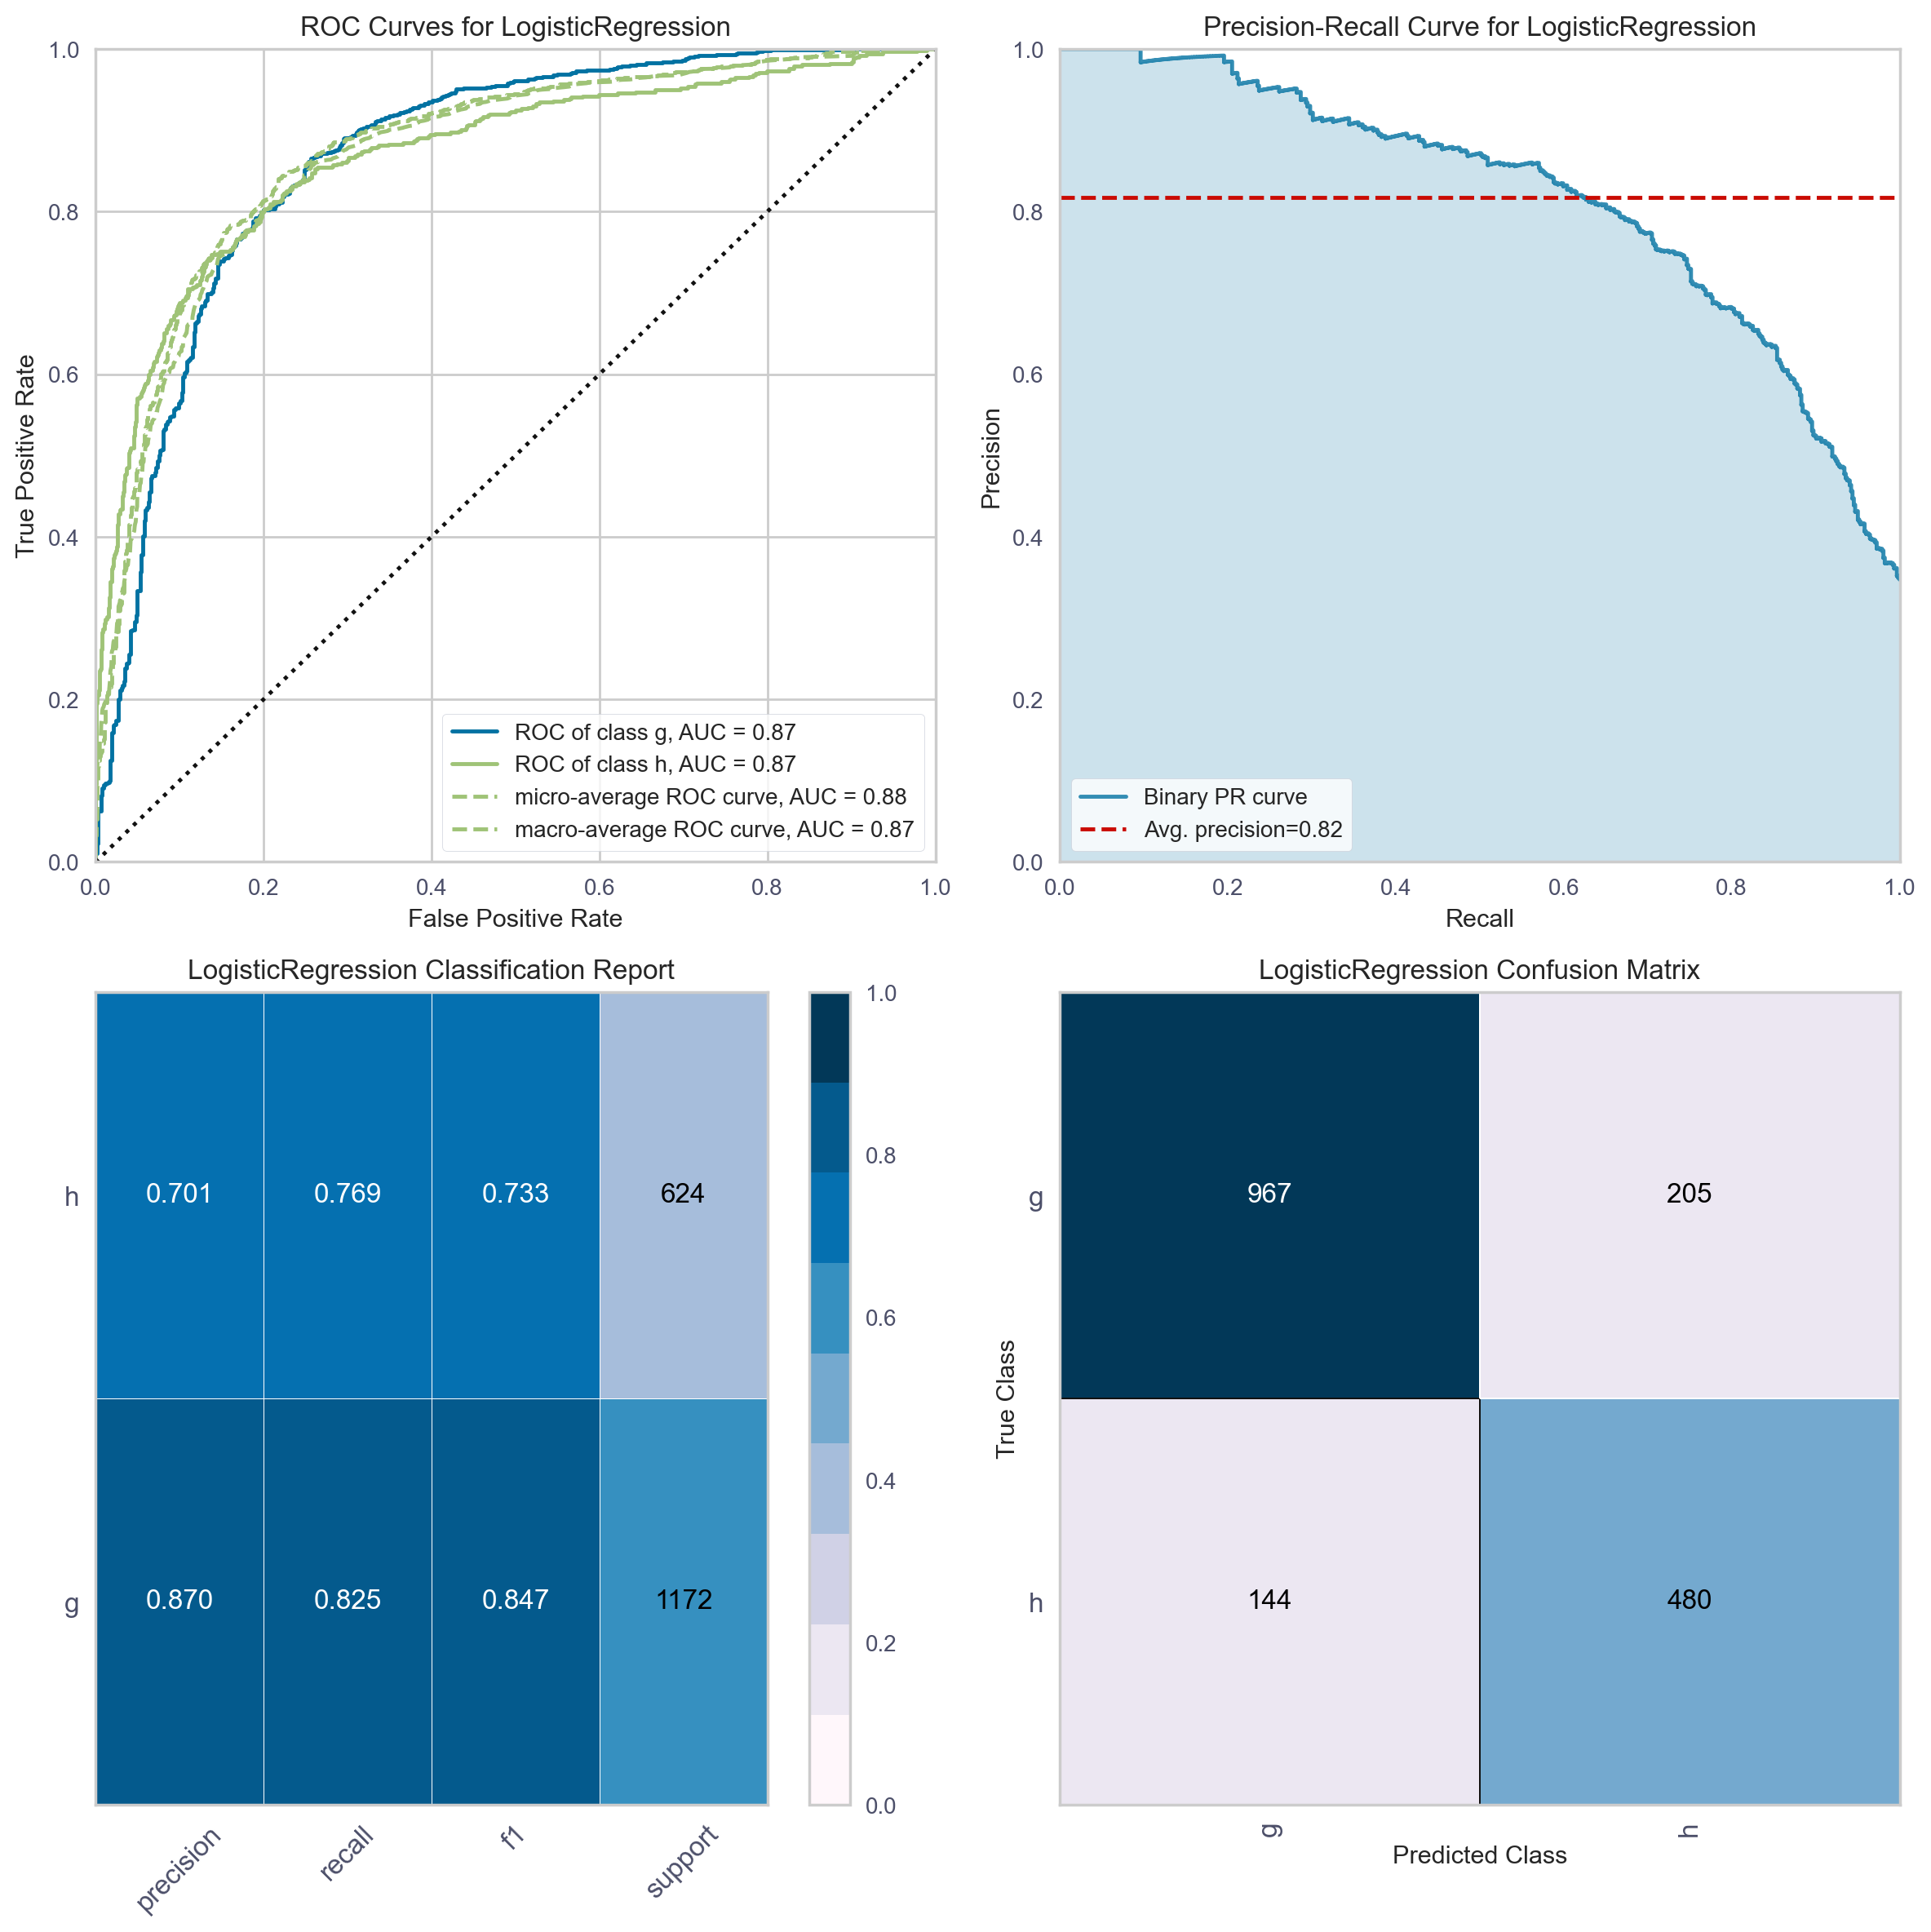

In [19]:
plot_classifier_reports(log_clf)

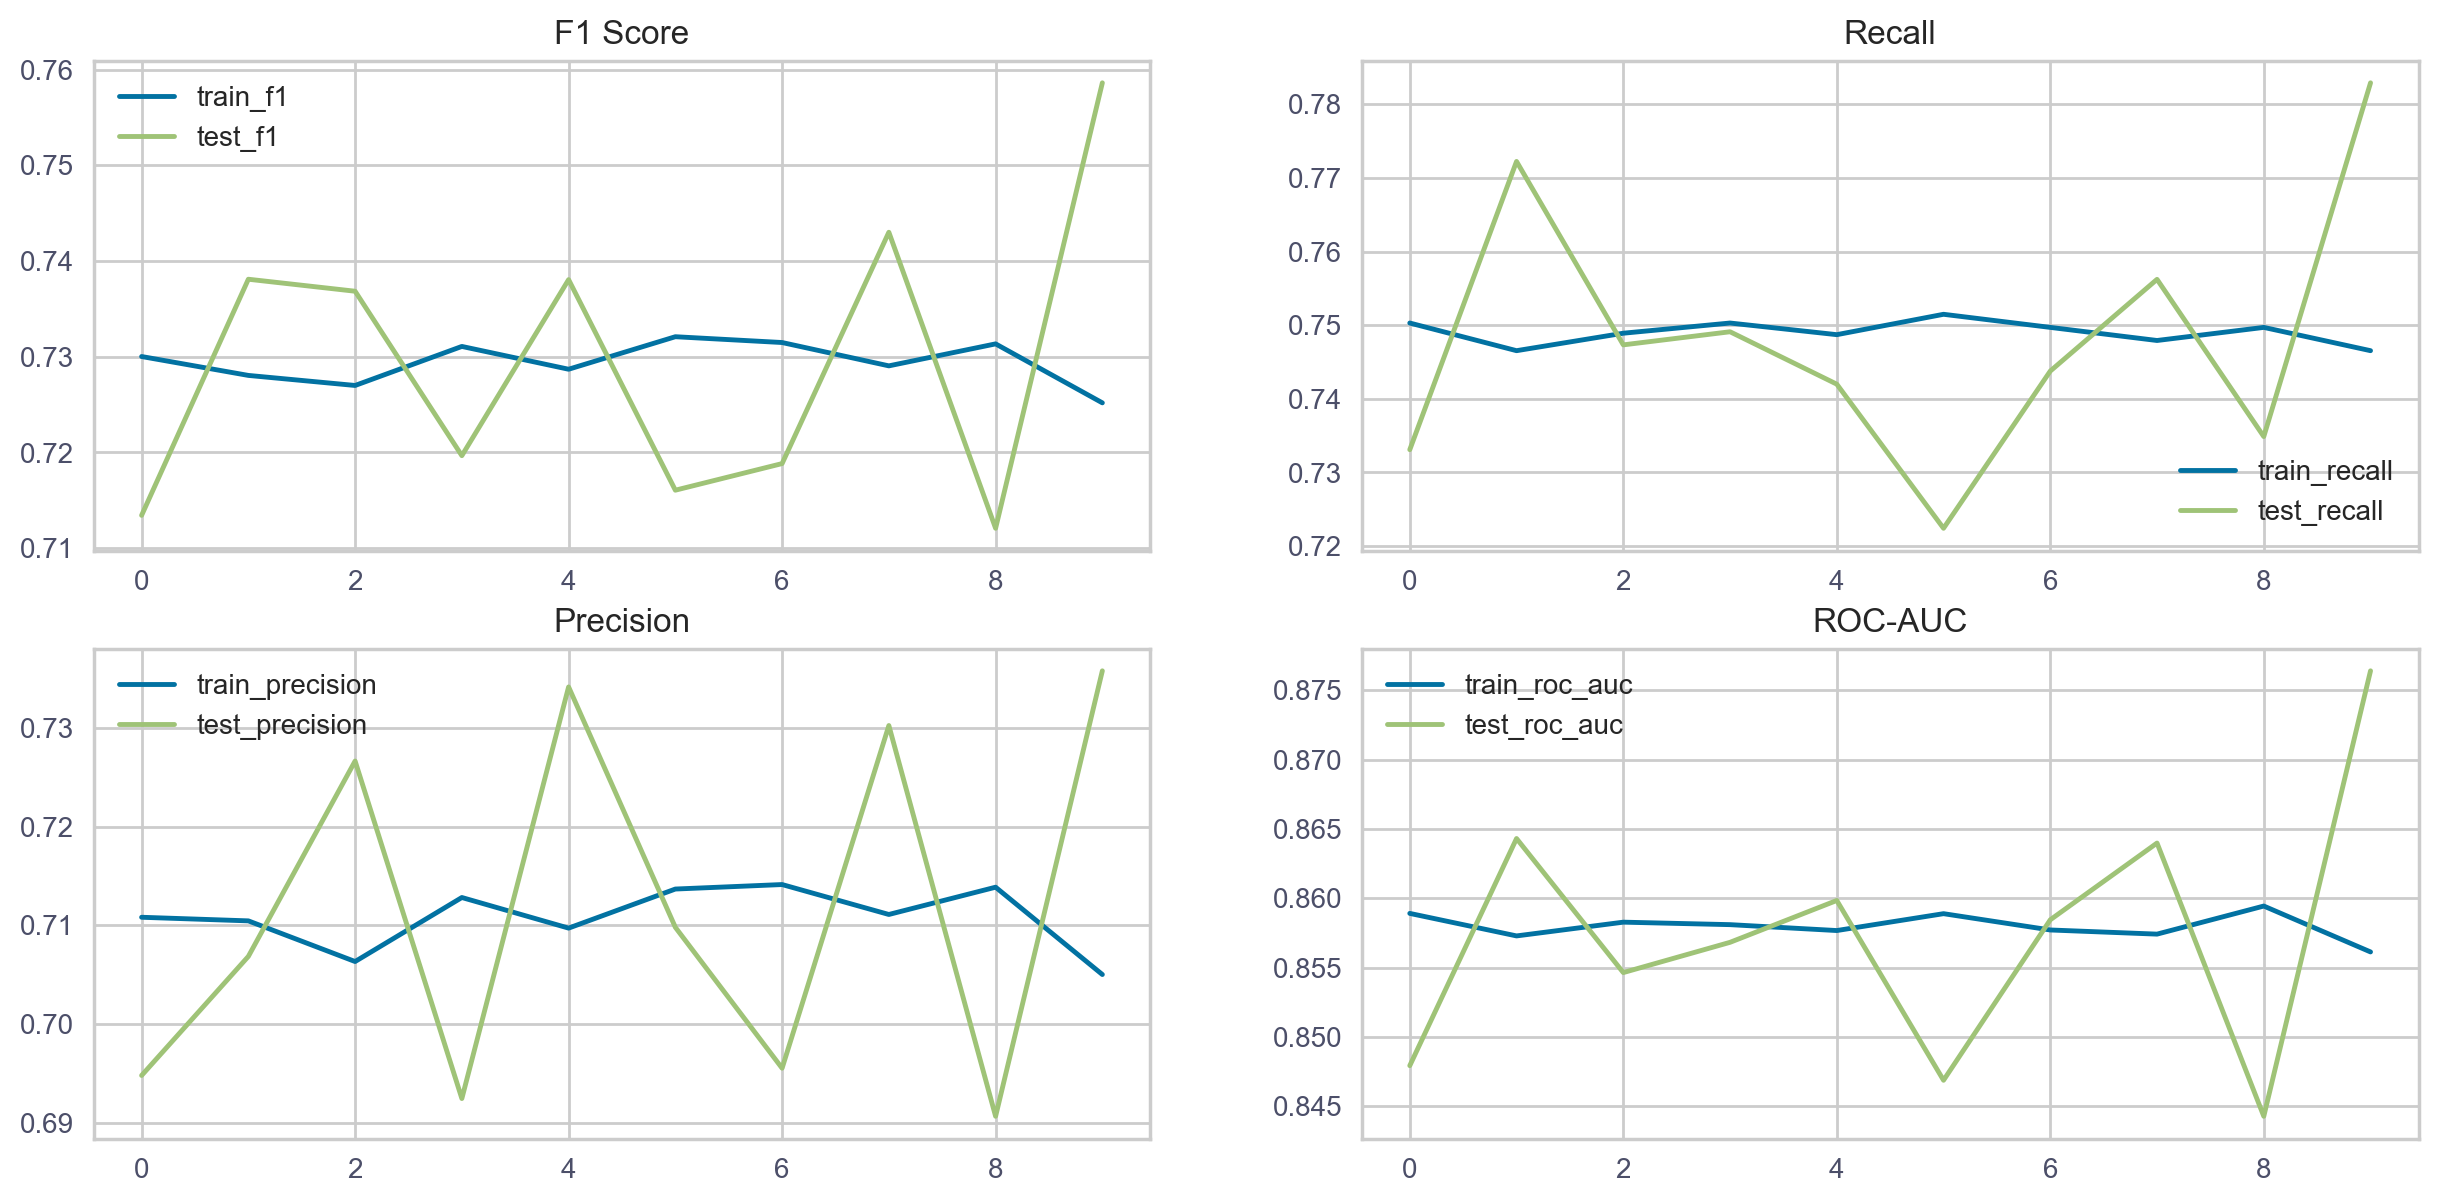

In [20]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', RidgeClassifier(max_iter=1000, class_weight='balanced', solver='saga'))
])

cross_val(ridge_clf)

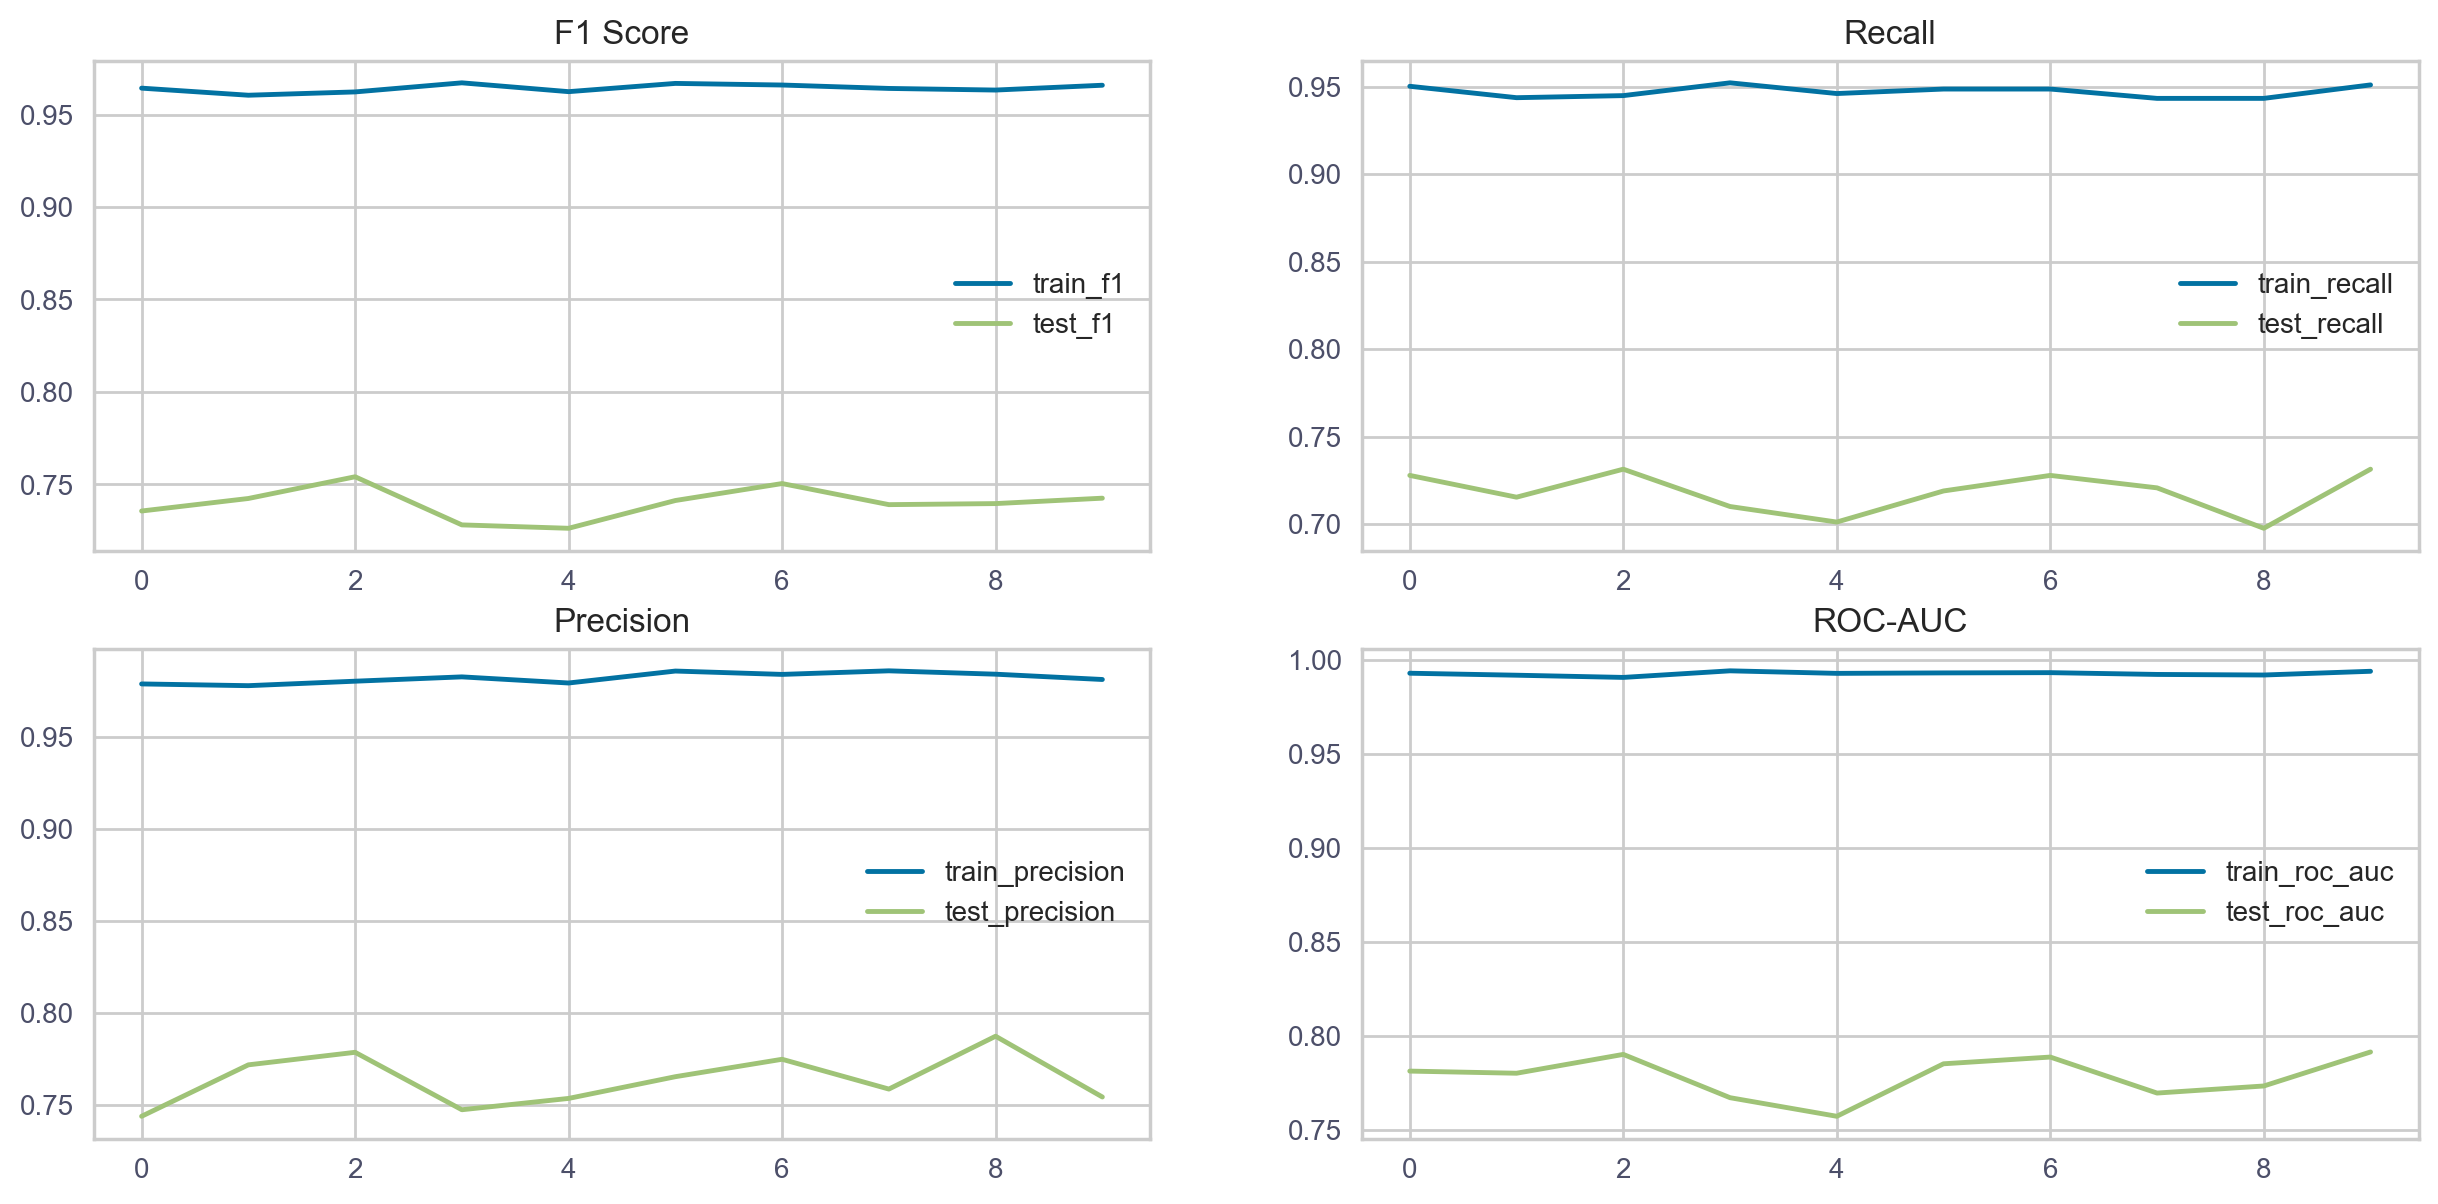

In [21]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dt', DecisionTreeClassifier(max_features=None, class_weight='balanced', max_depth=16))
])

cross_val(dt_clf)

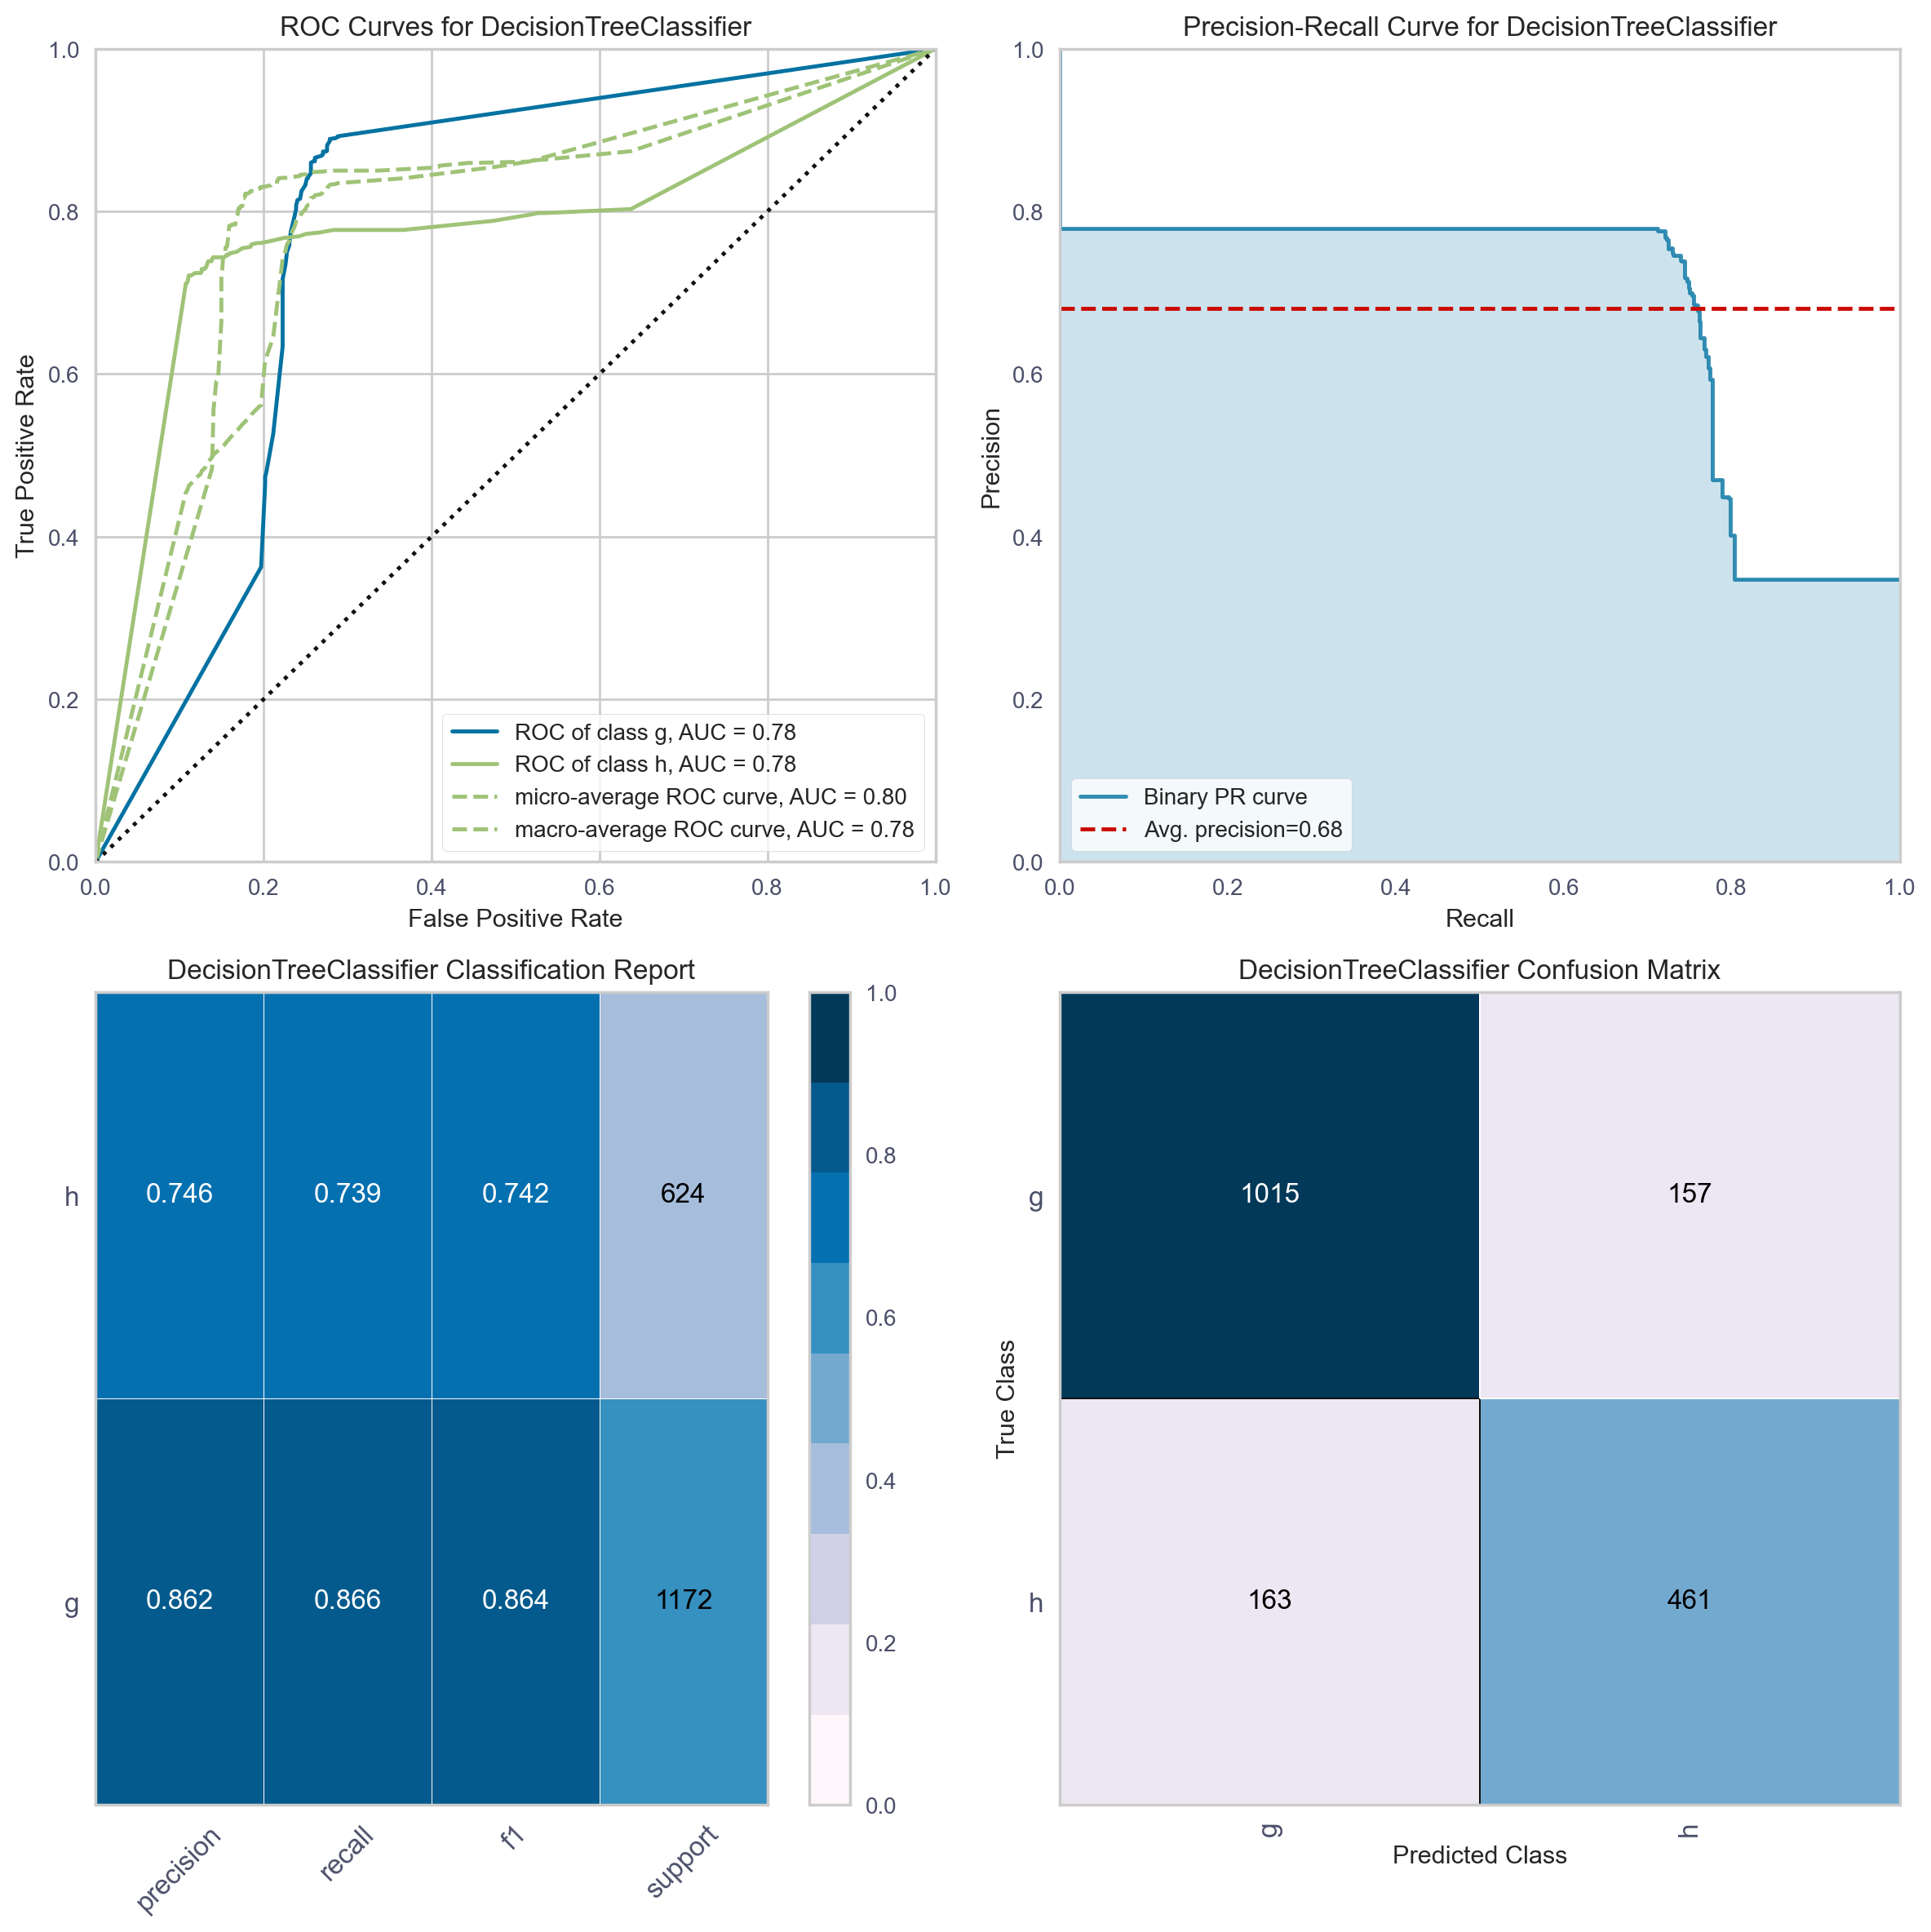

In [22]:
plot_classifier_reports(dt_clf)

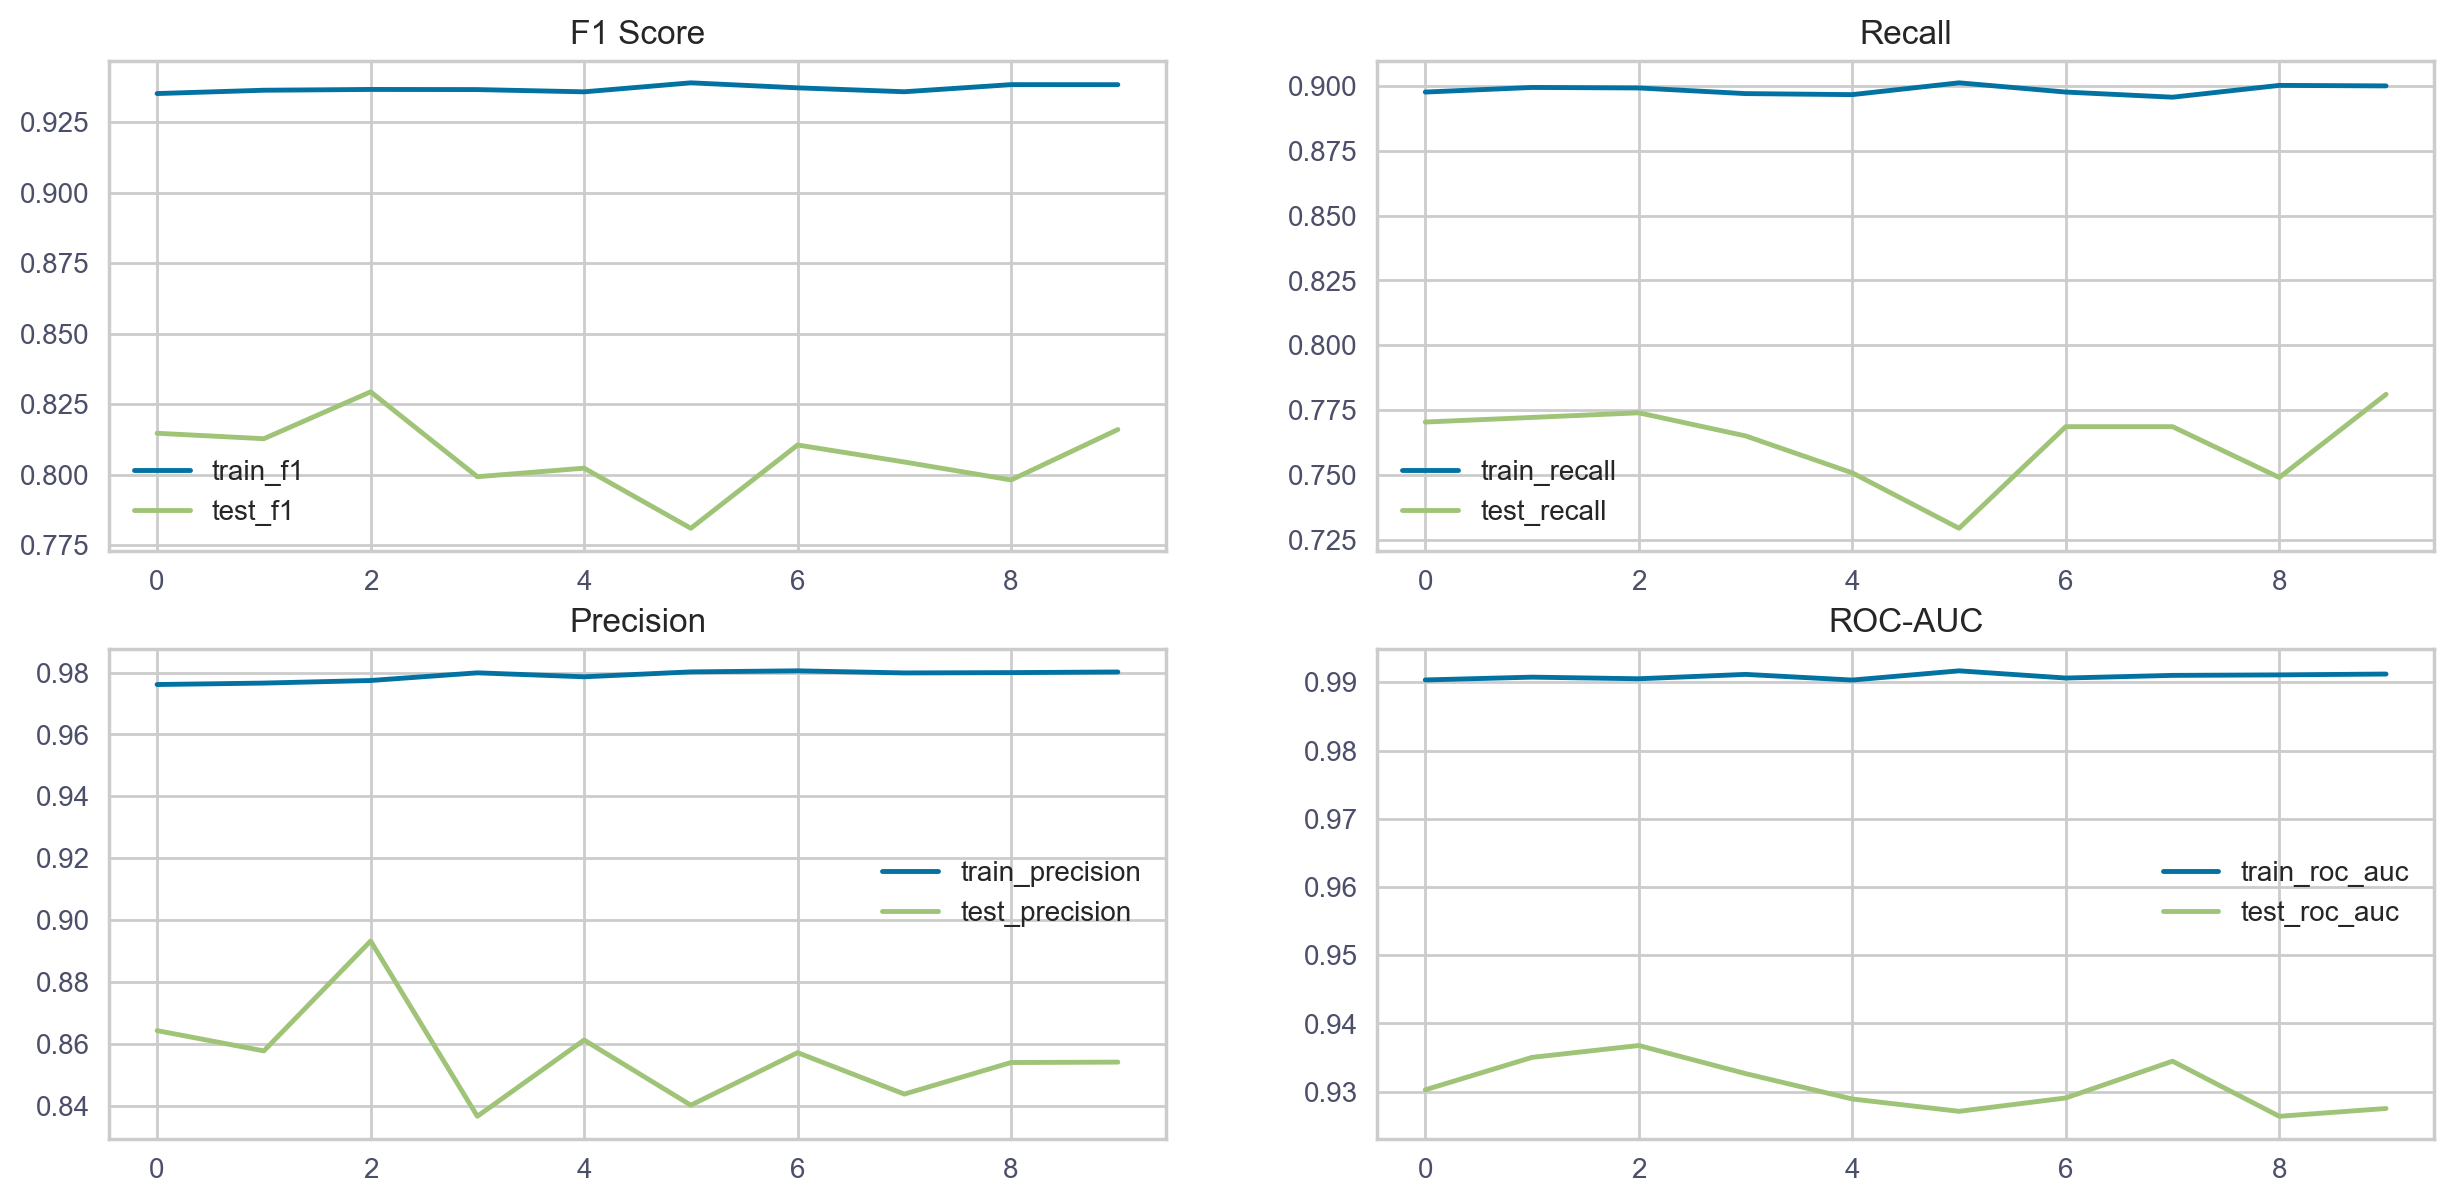

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=13, n_estimators=300))
])

cross_val(rf_clf)

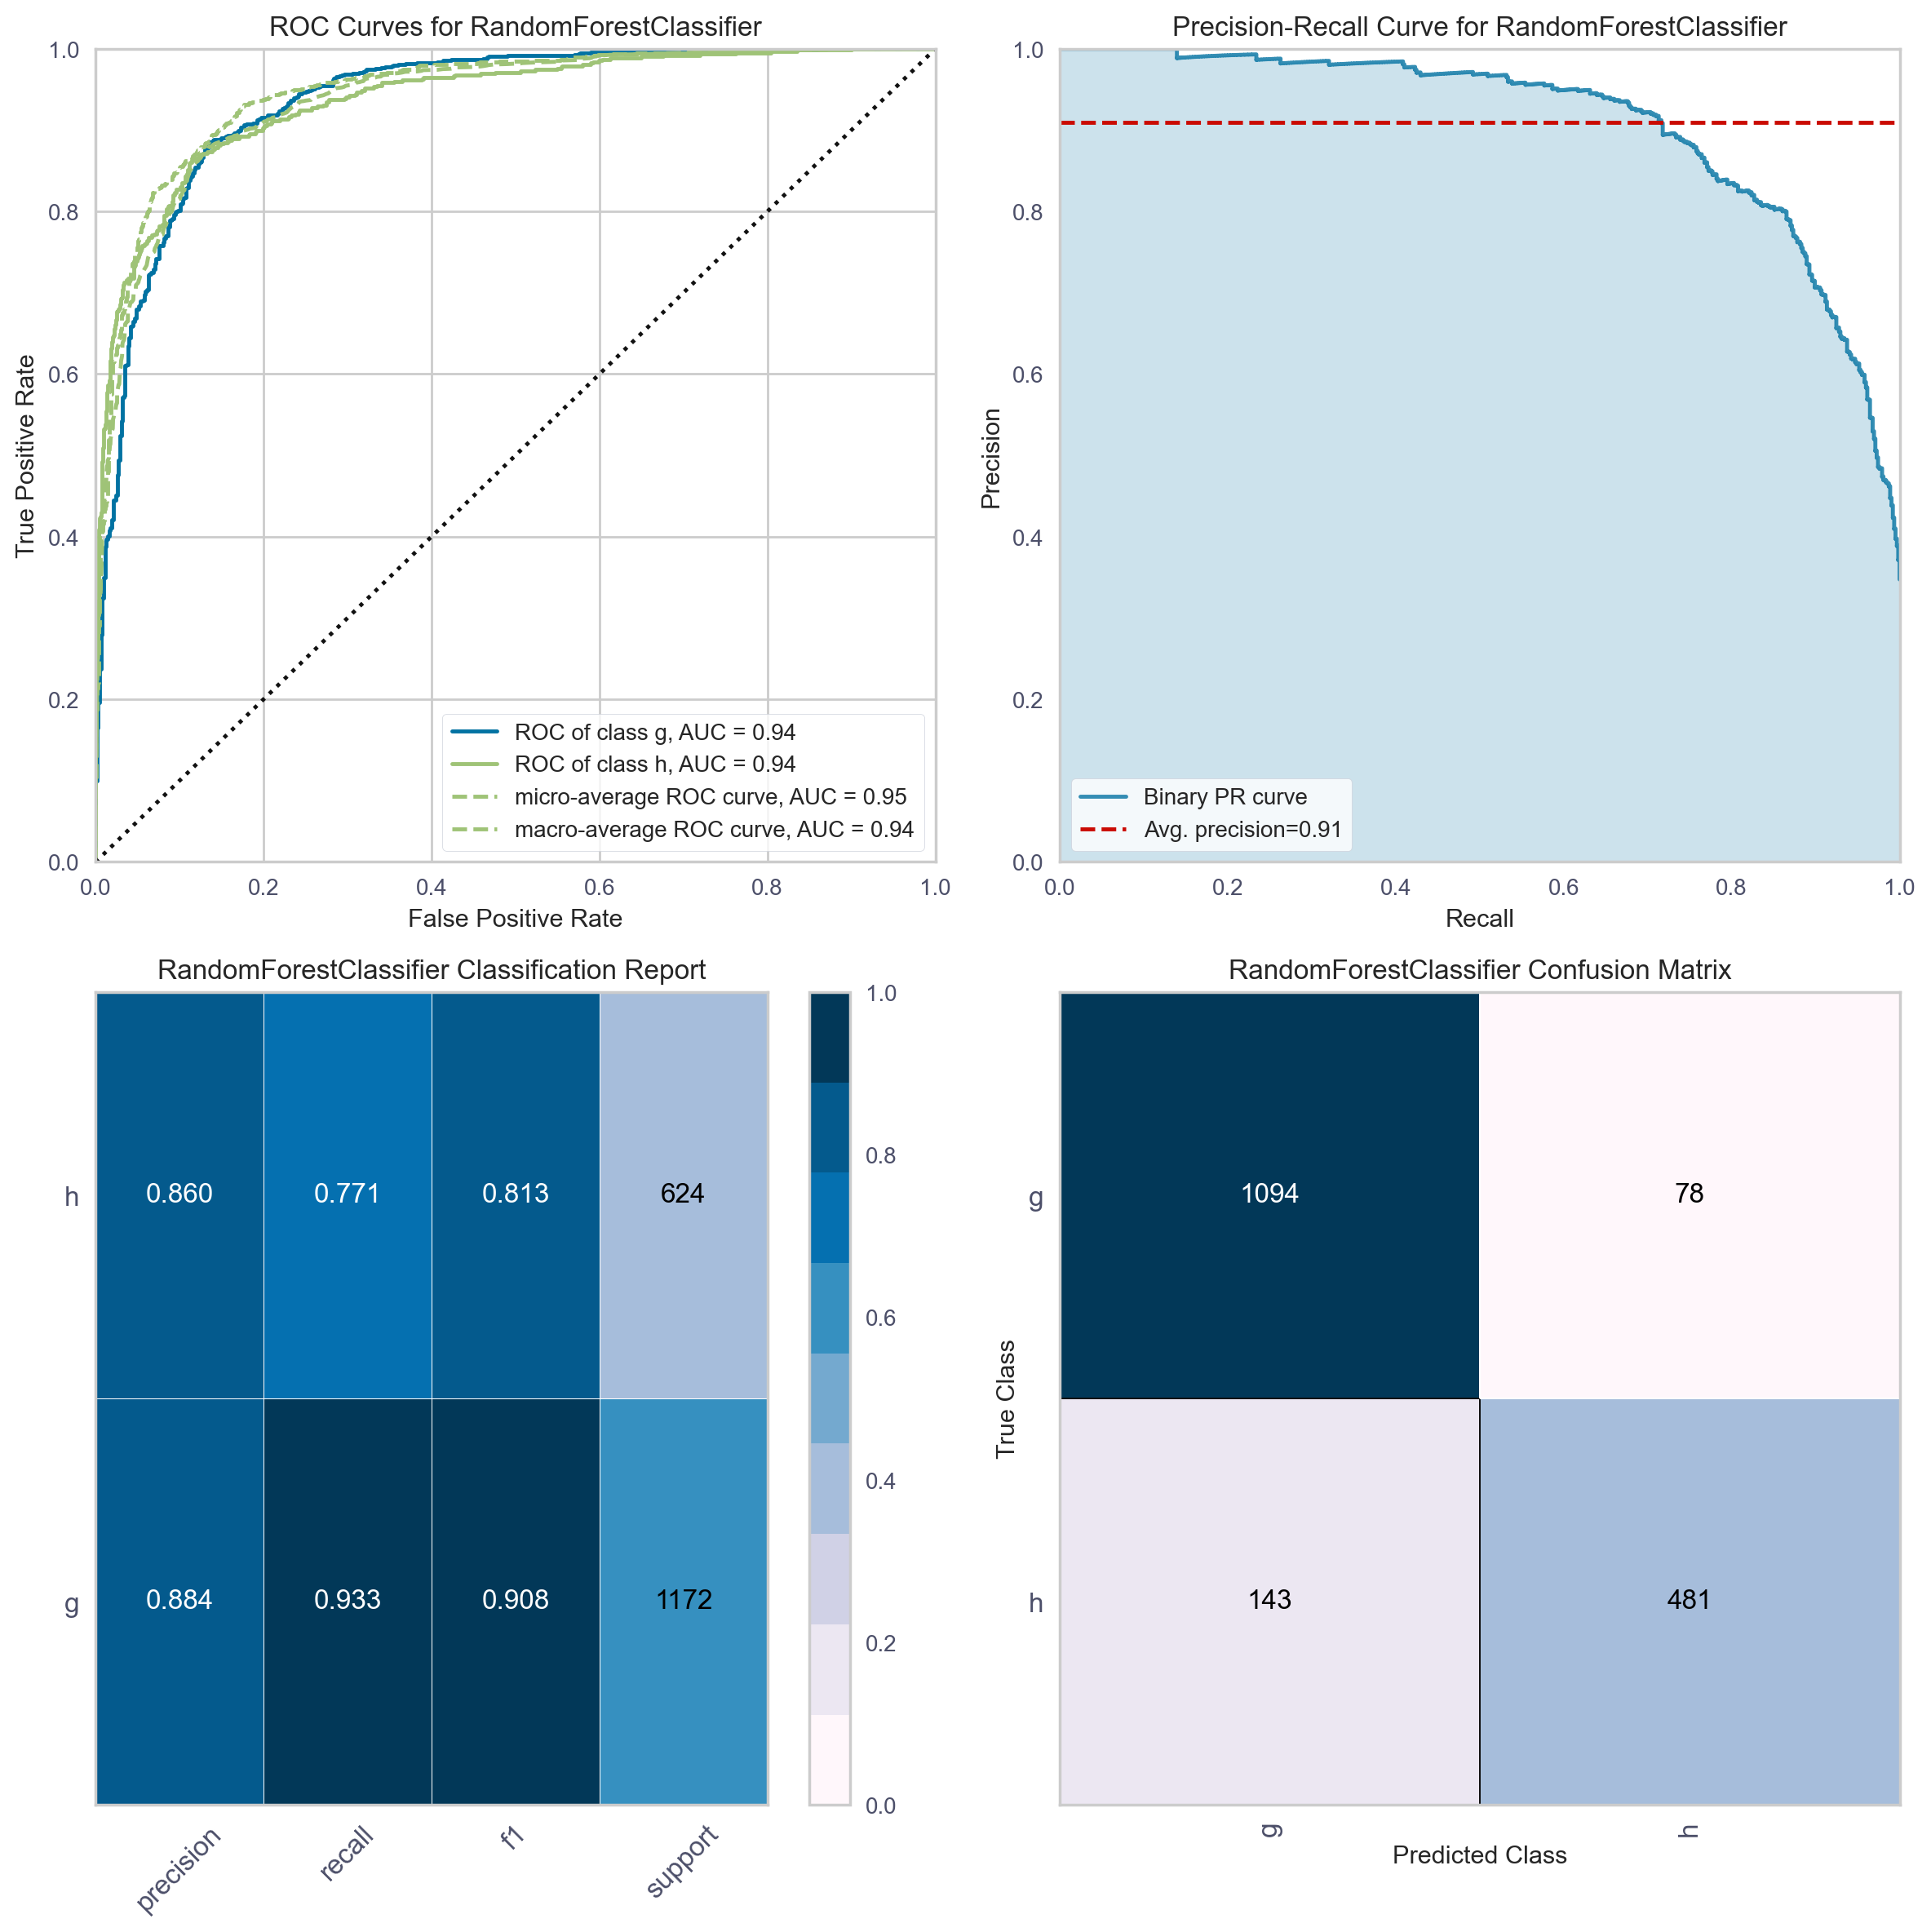

In [24]:
plot_classifier_reports(rf_clf)

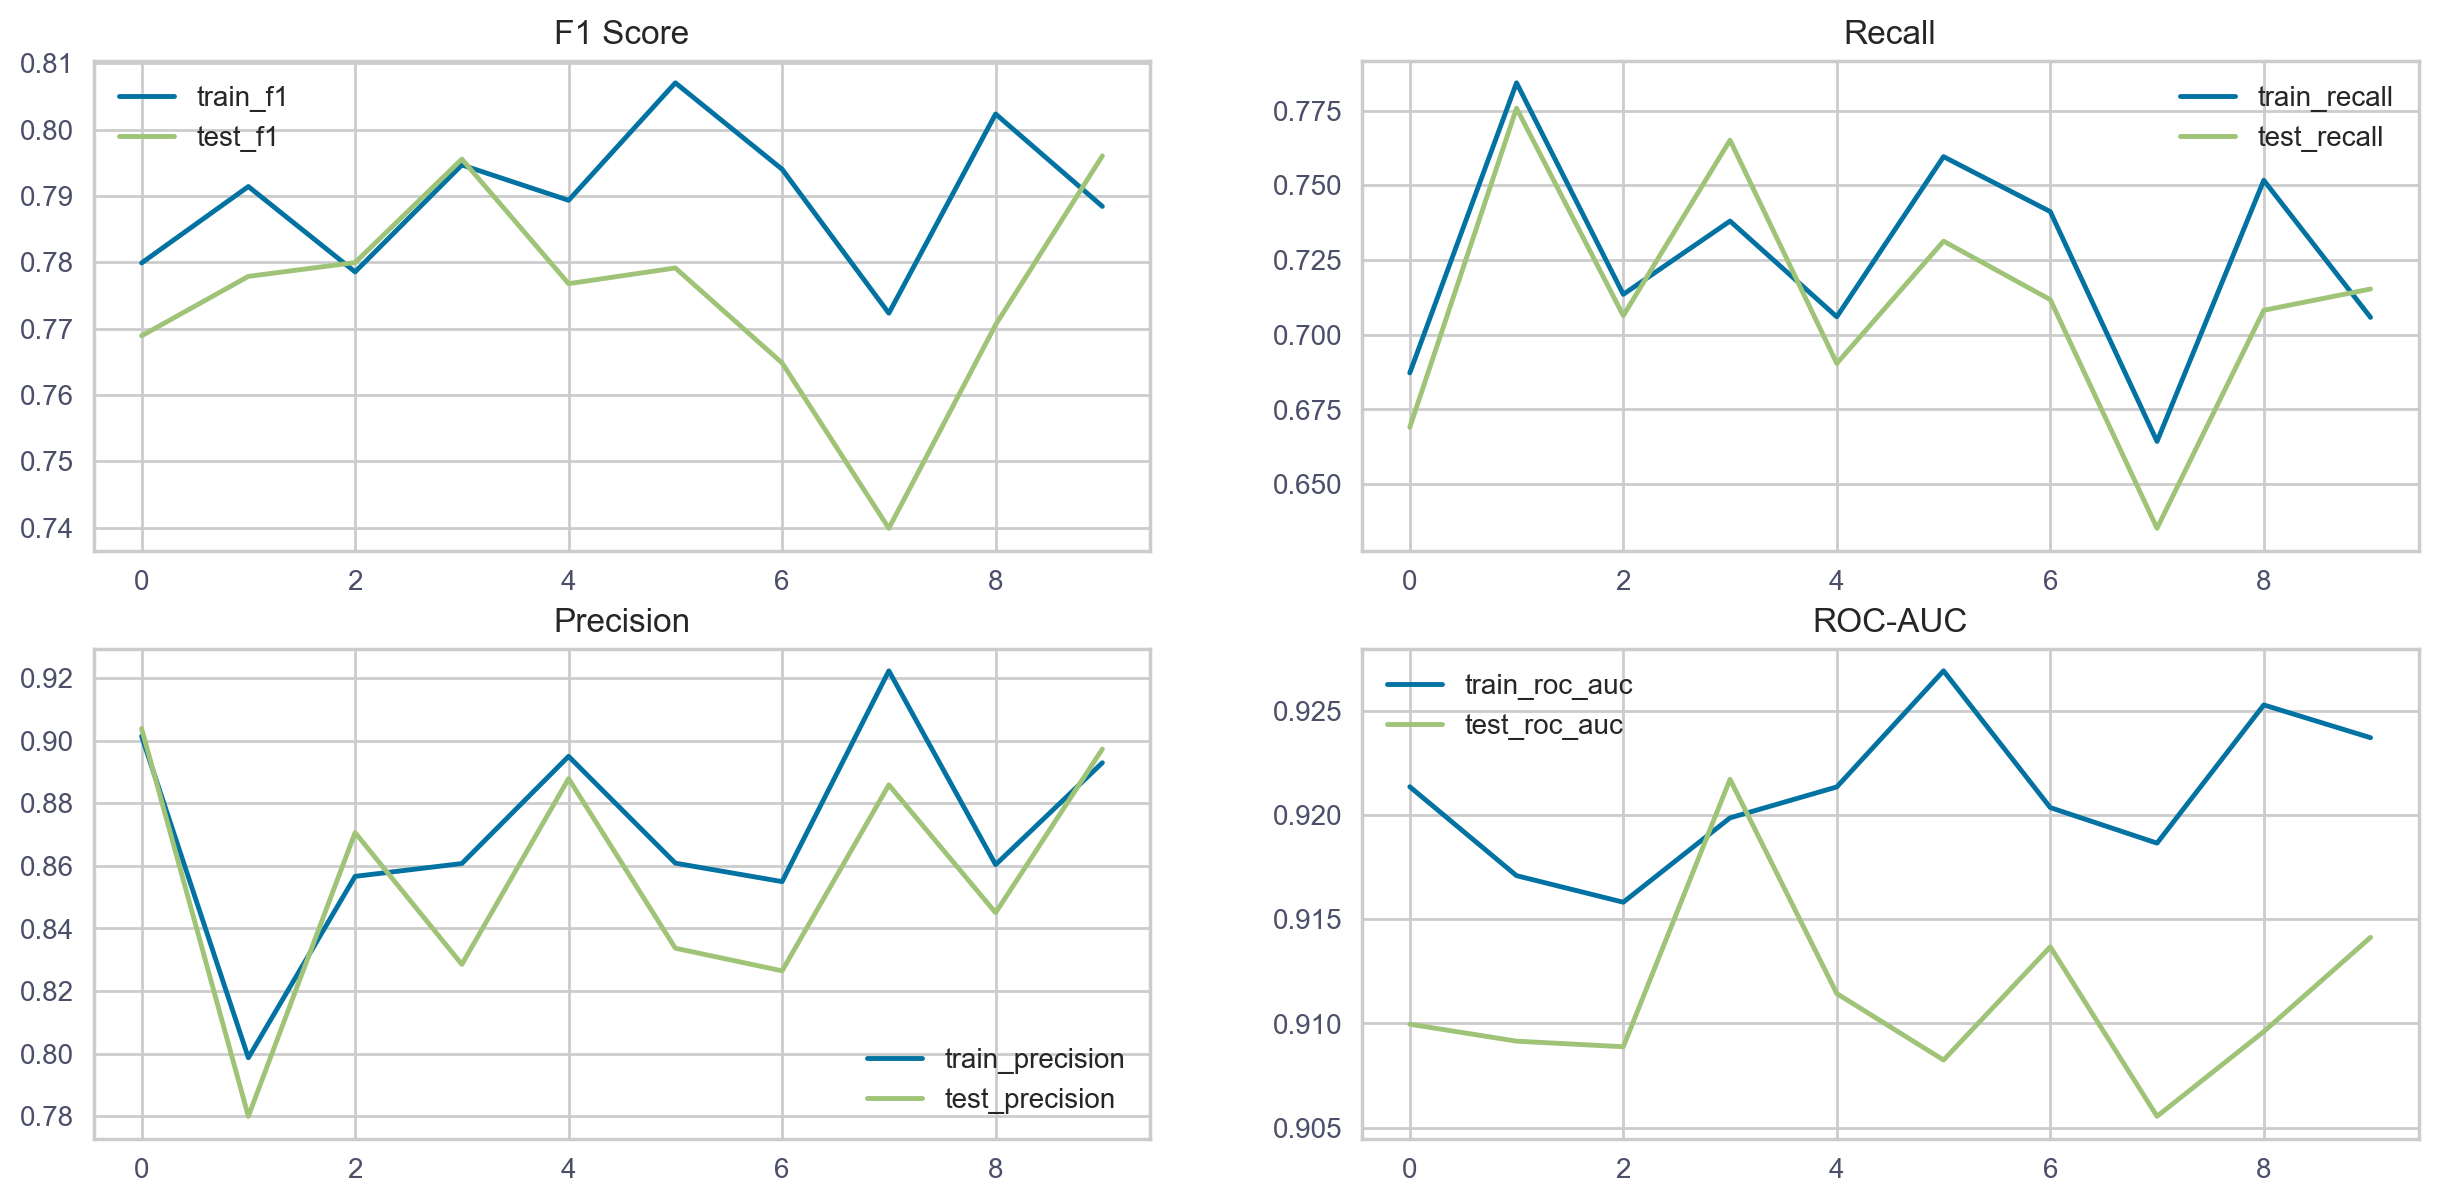

In [25]:
from sklearn.neural_network import MLPClassifier

nn_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('nn', MLPClassifier(activation='tanh', max_iter=10000, hidden_layer_sizes=150))
])

cross_val(nn_clf)

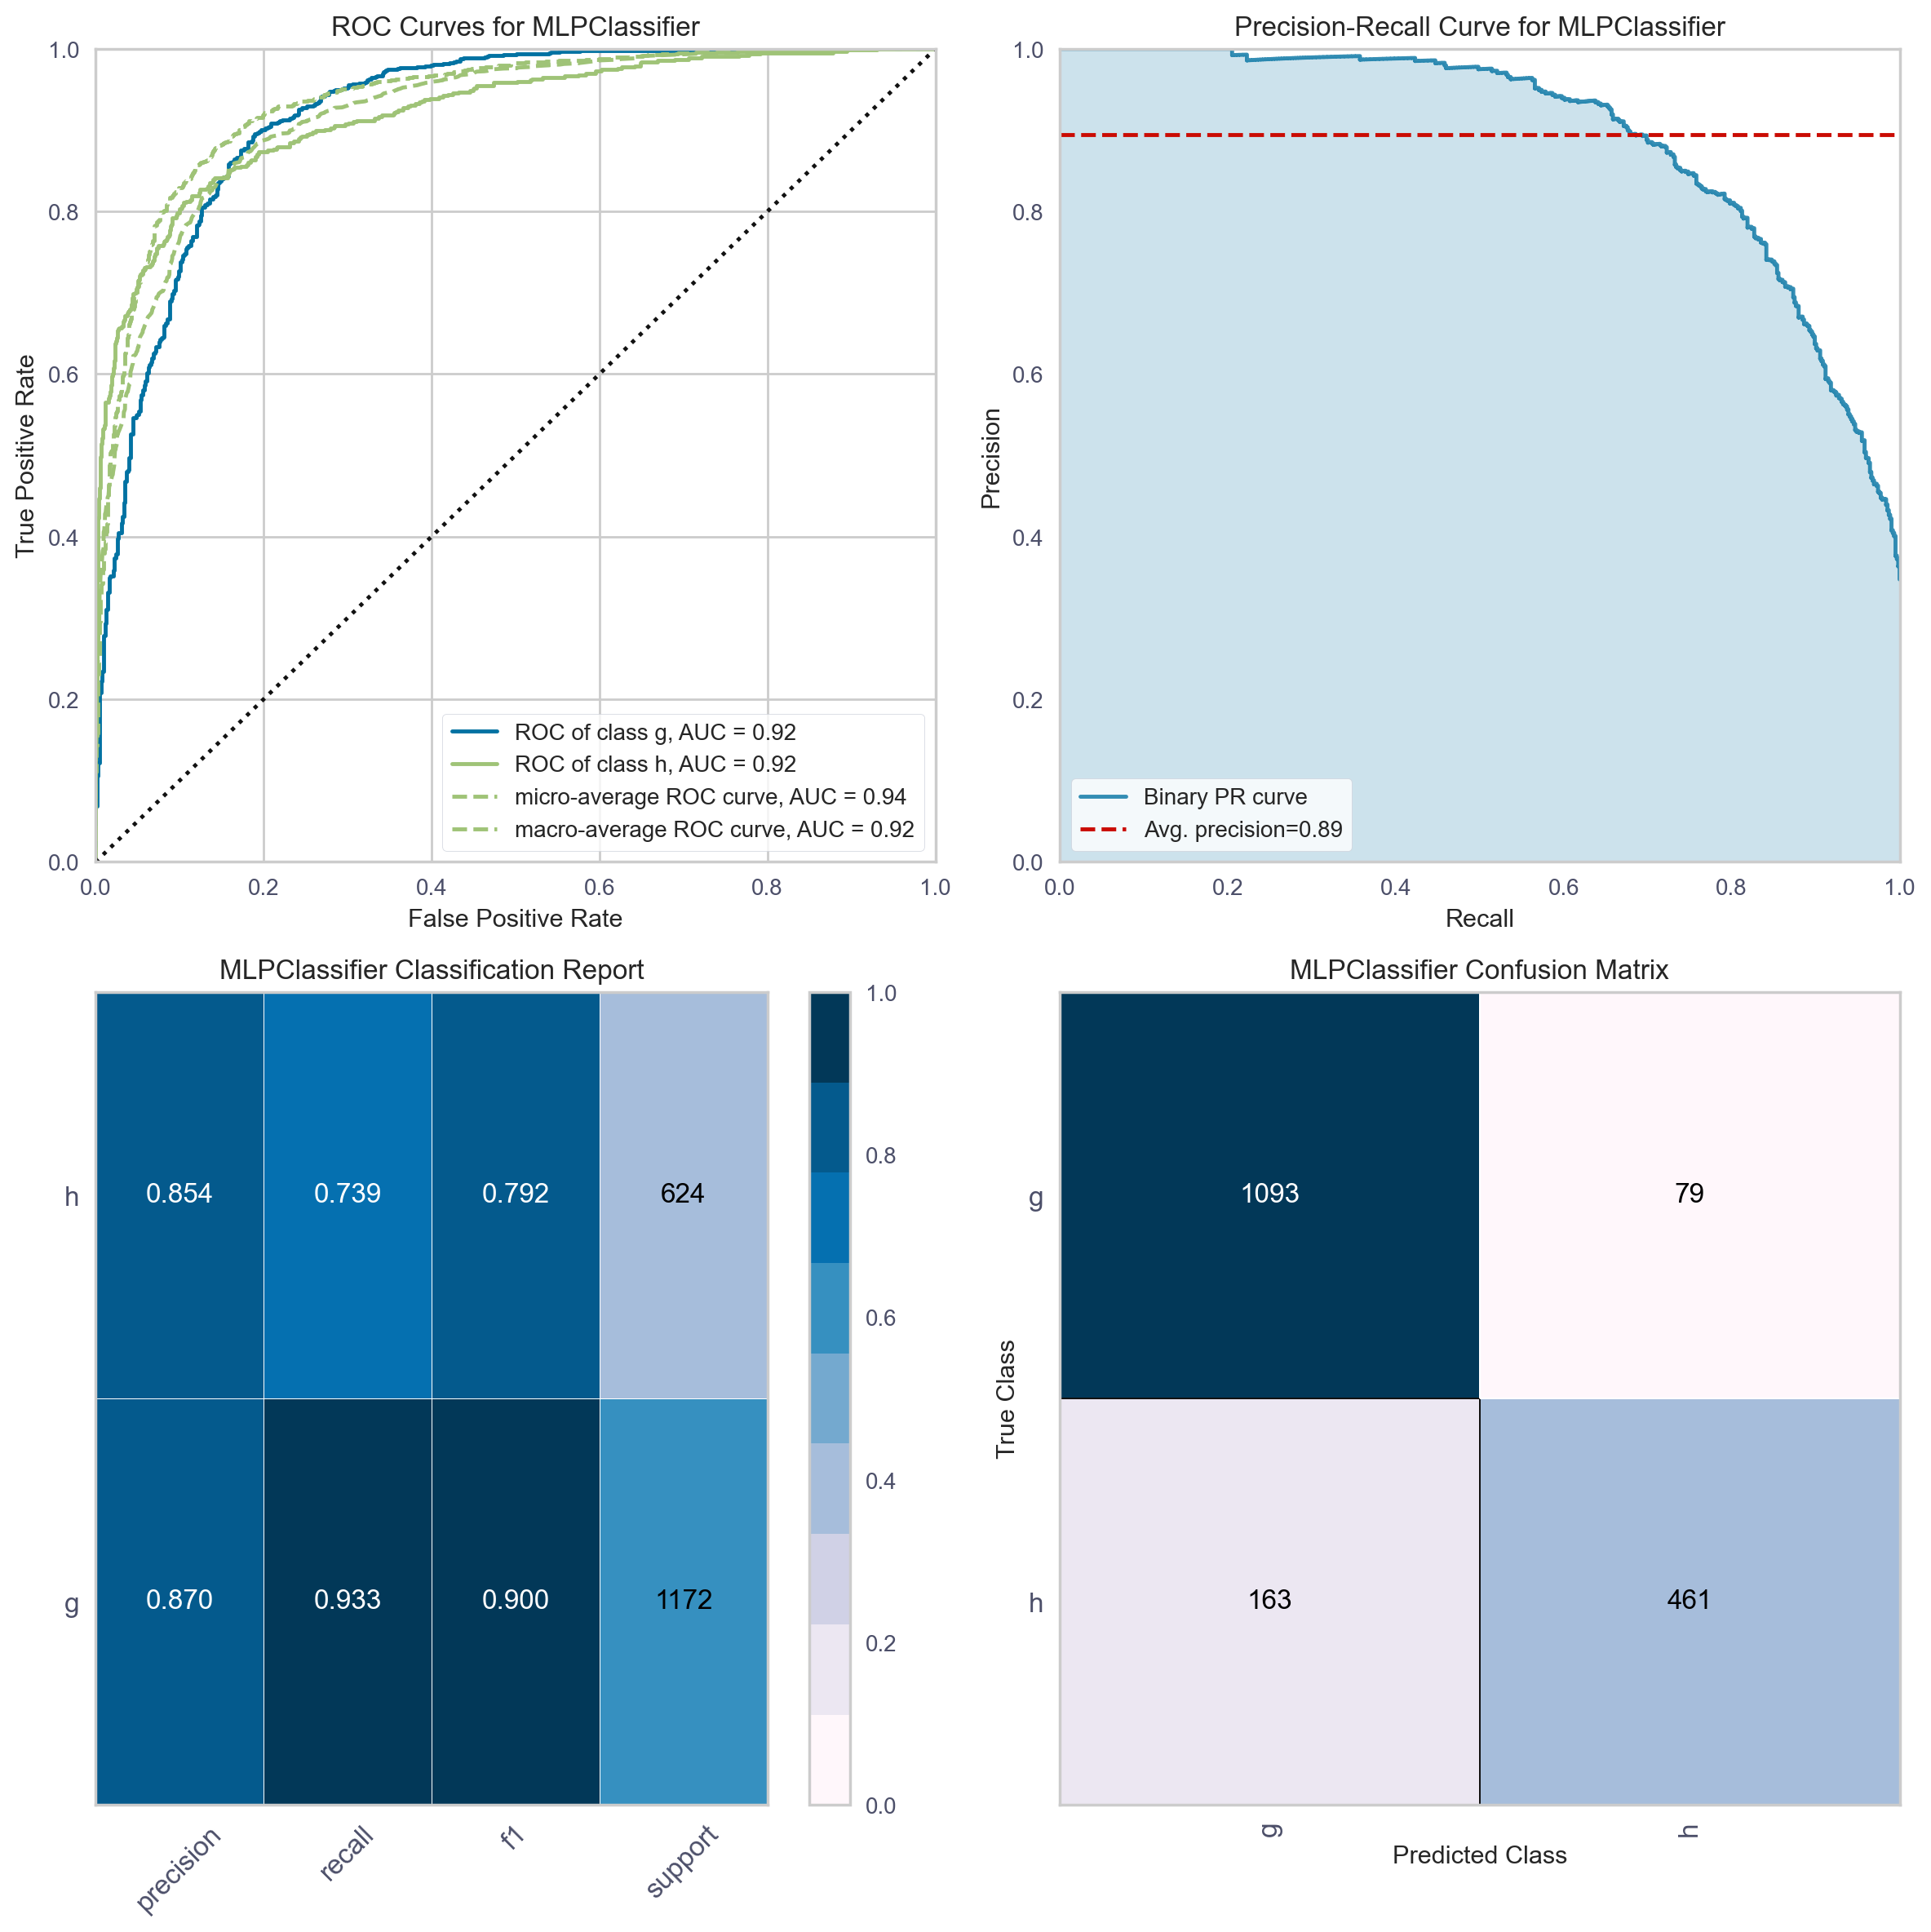

In [26]:
plot_classifier_reports(nn_clf)

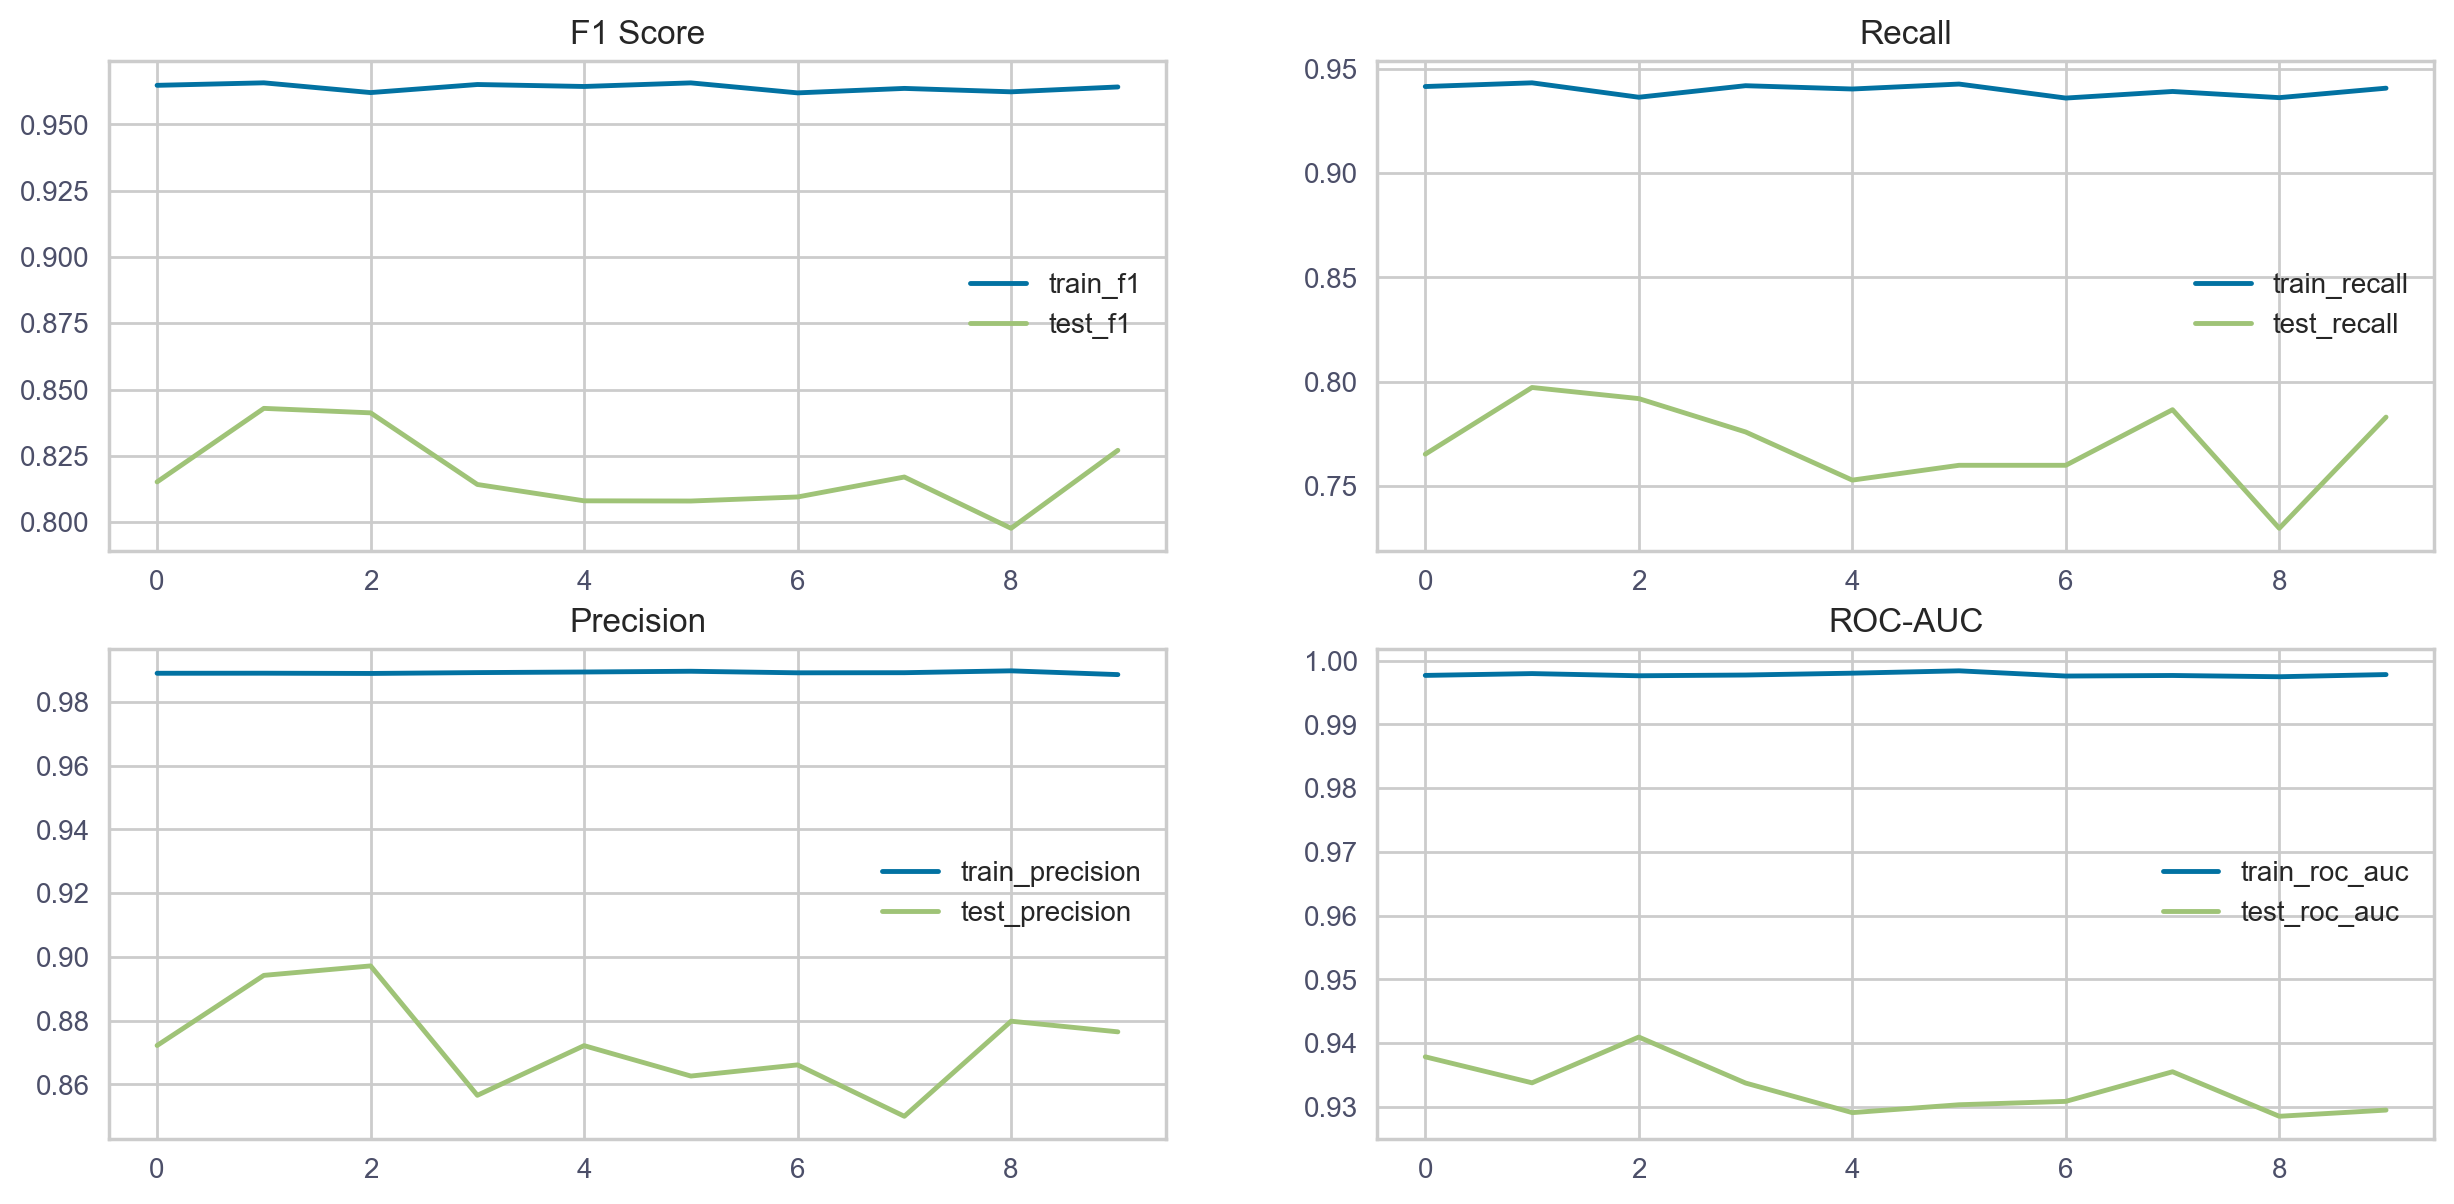

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('gbc', GradientBoostingClassifier(max_depth=5, n_estimators=500))
])

cross_val(gbc_clf)

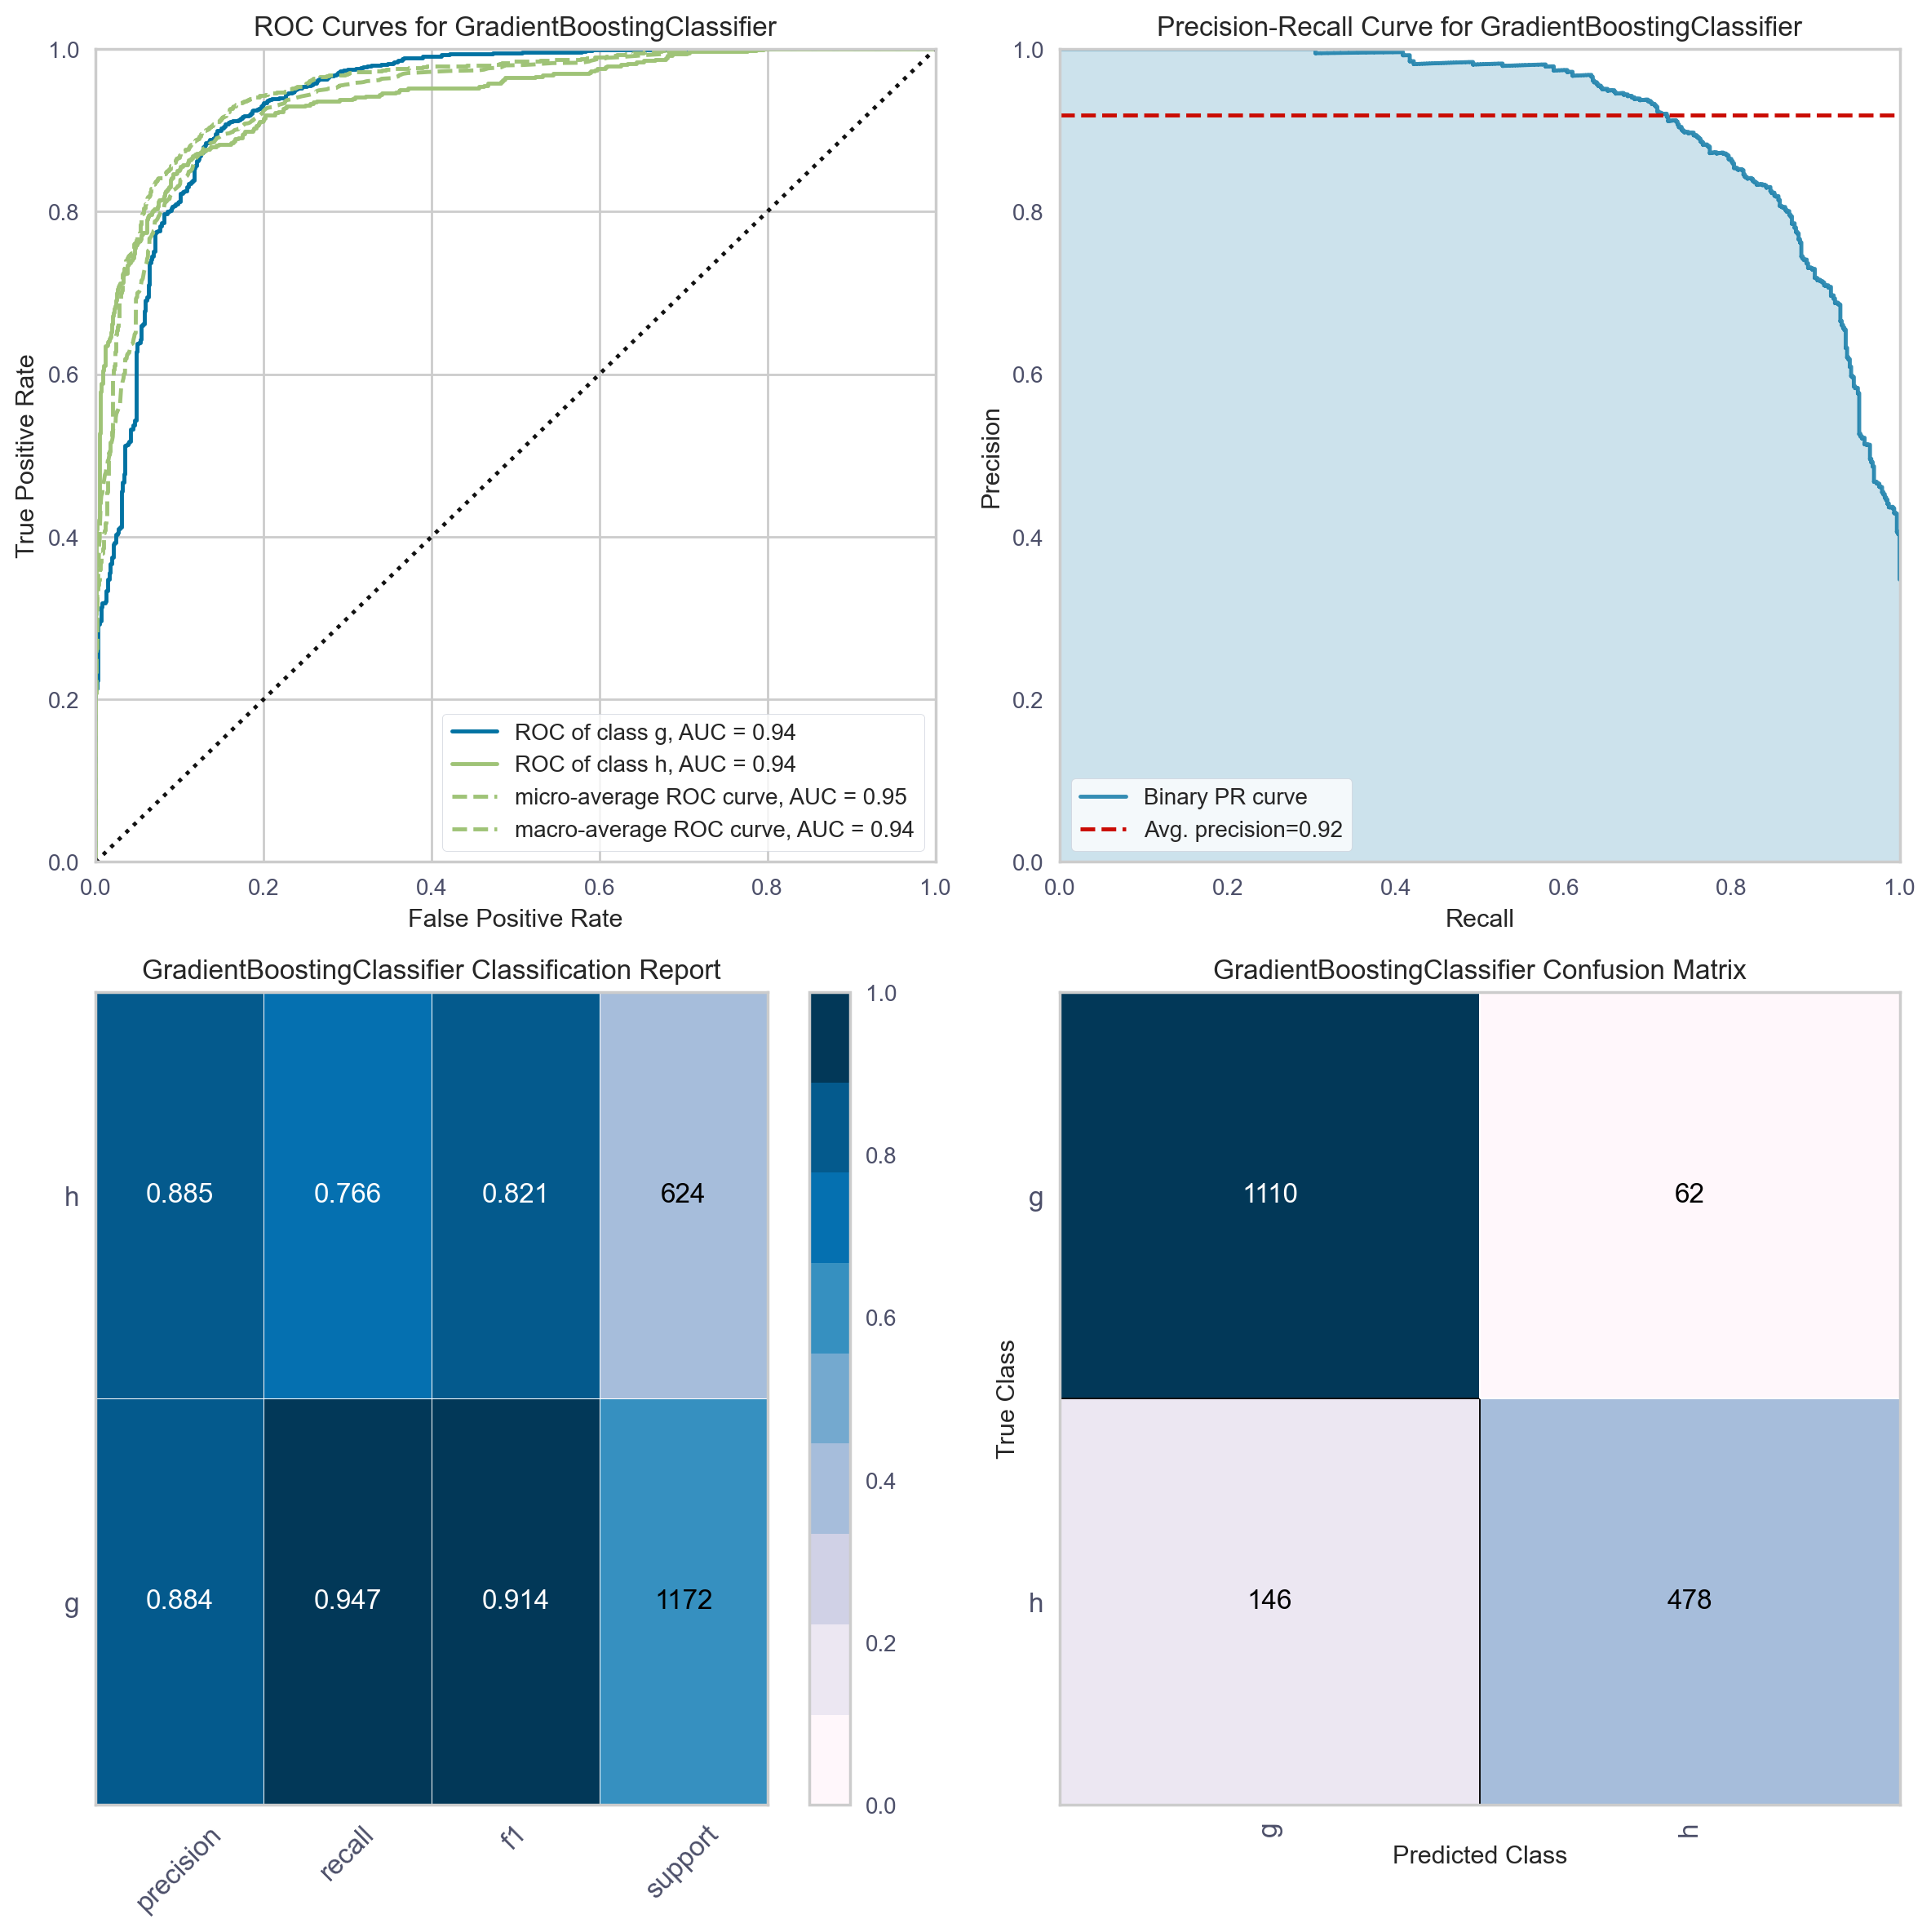

In [28]:
plot_classifier_reports(gbc_clf)

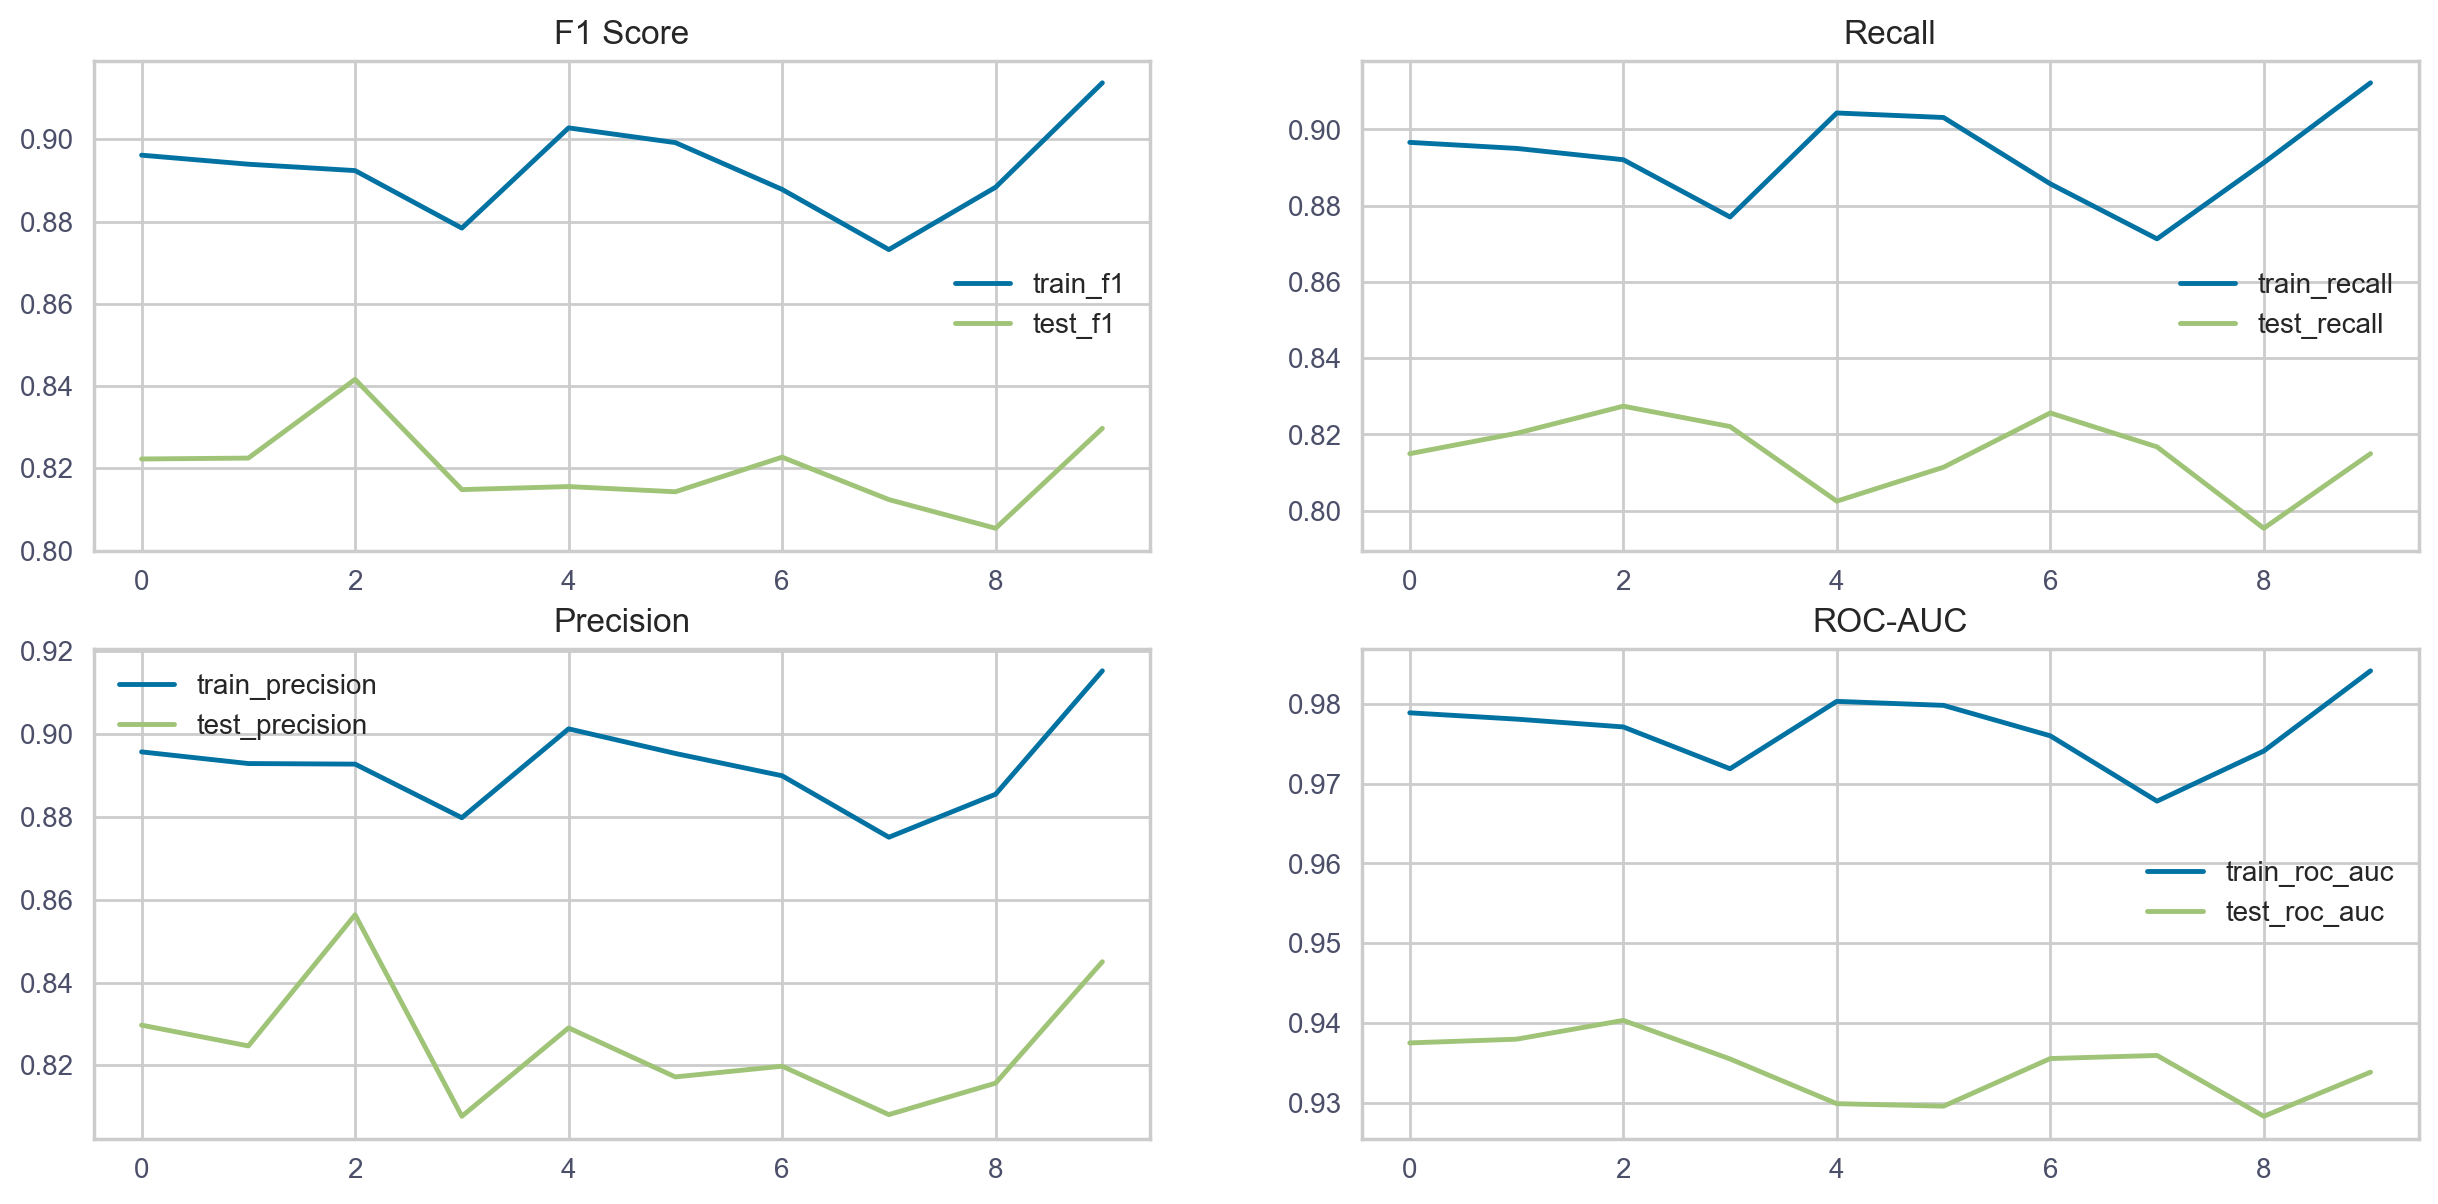

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgbc_clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('hgbc', HistGradientBoostingClassifier(class_weight='balanced', max_iter=10000, max_depth=18))
])

cross_val(hgbc_clf)

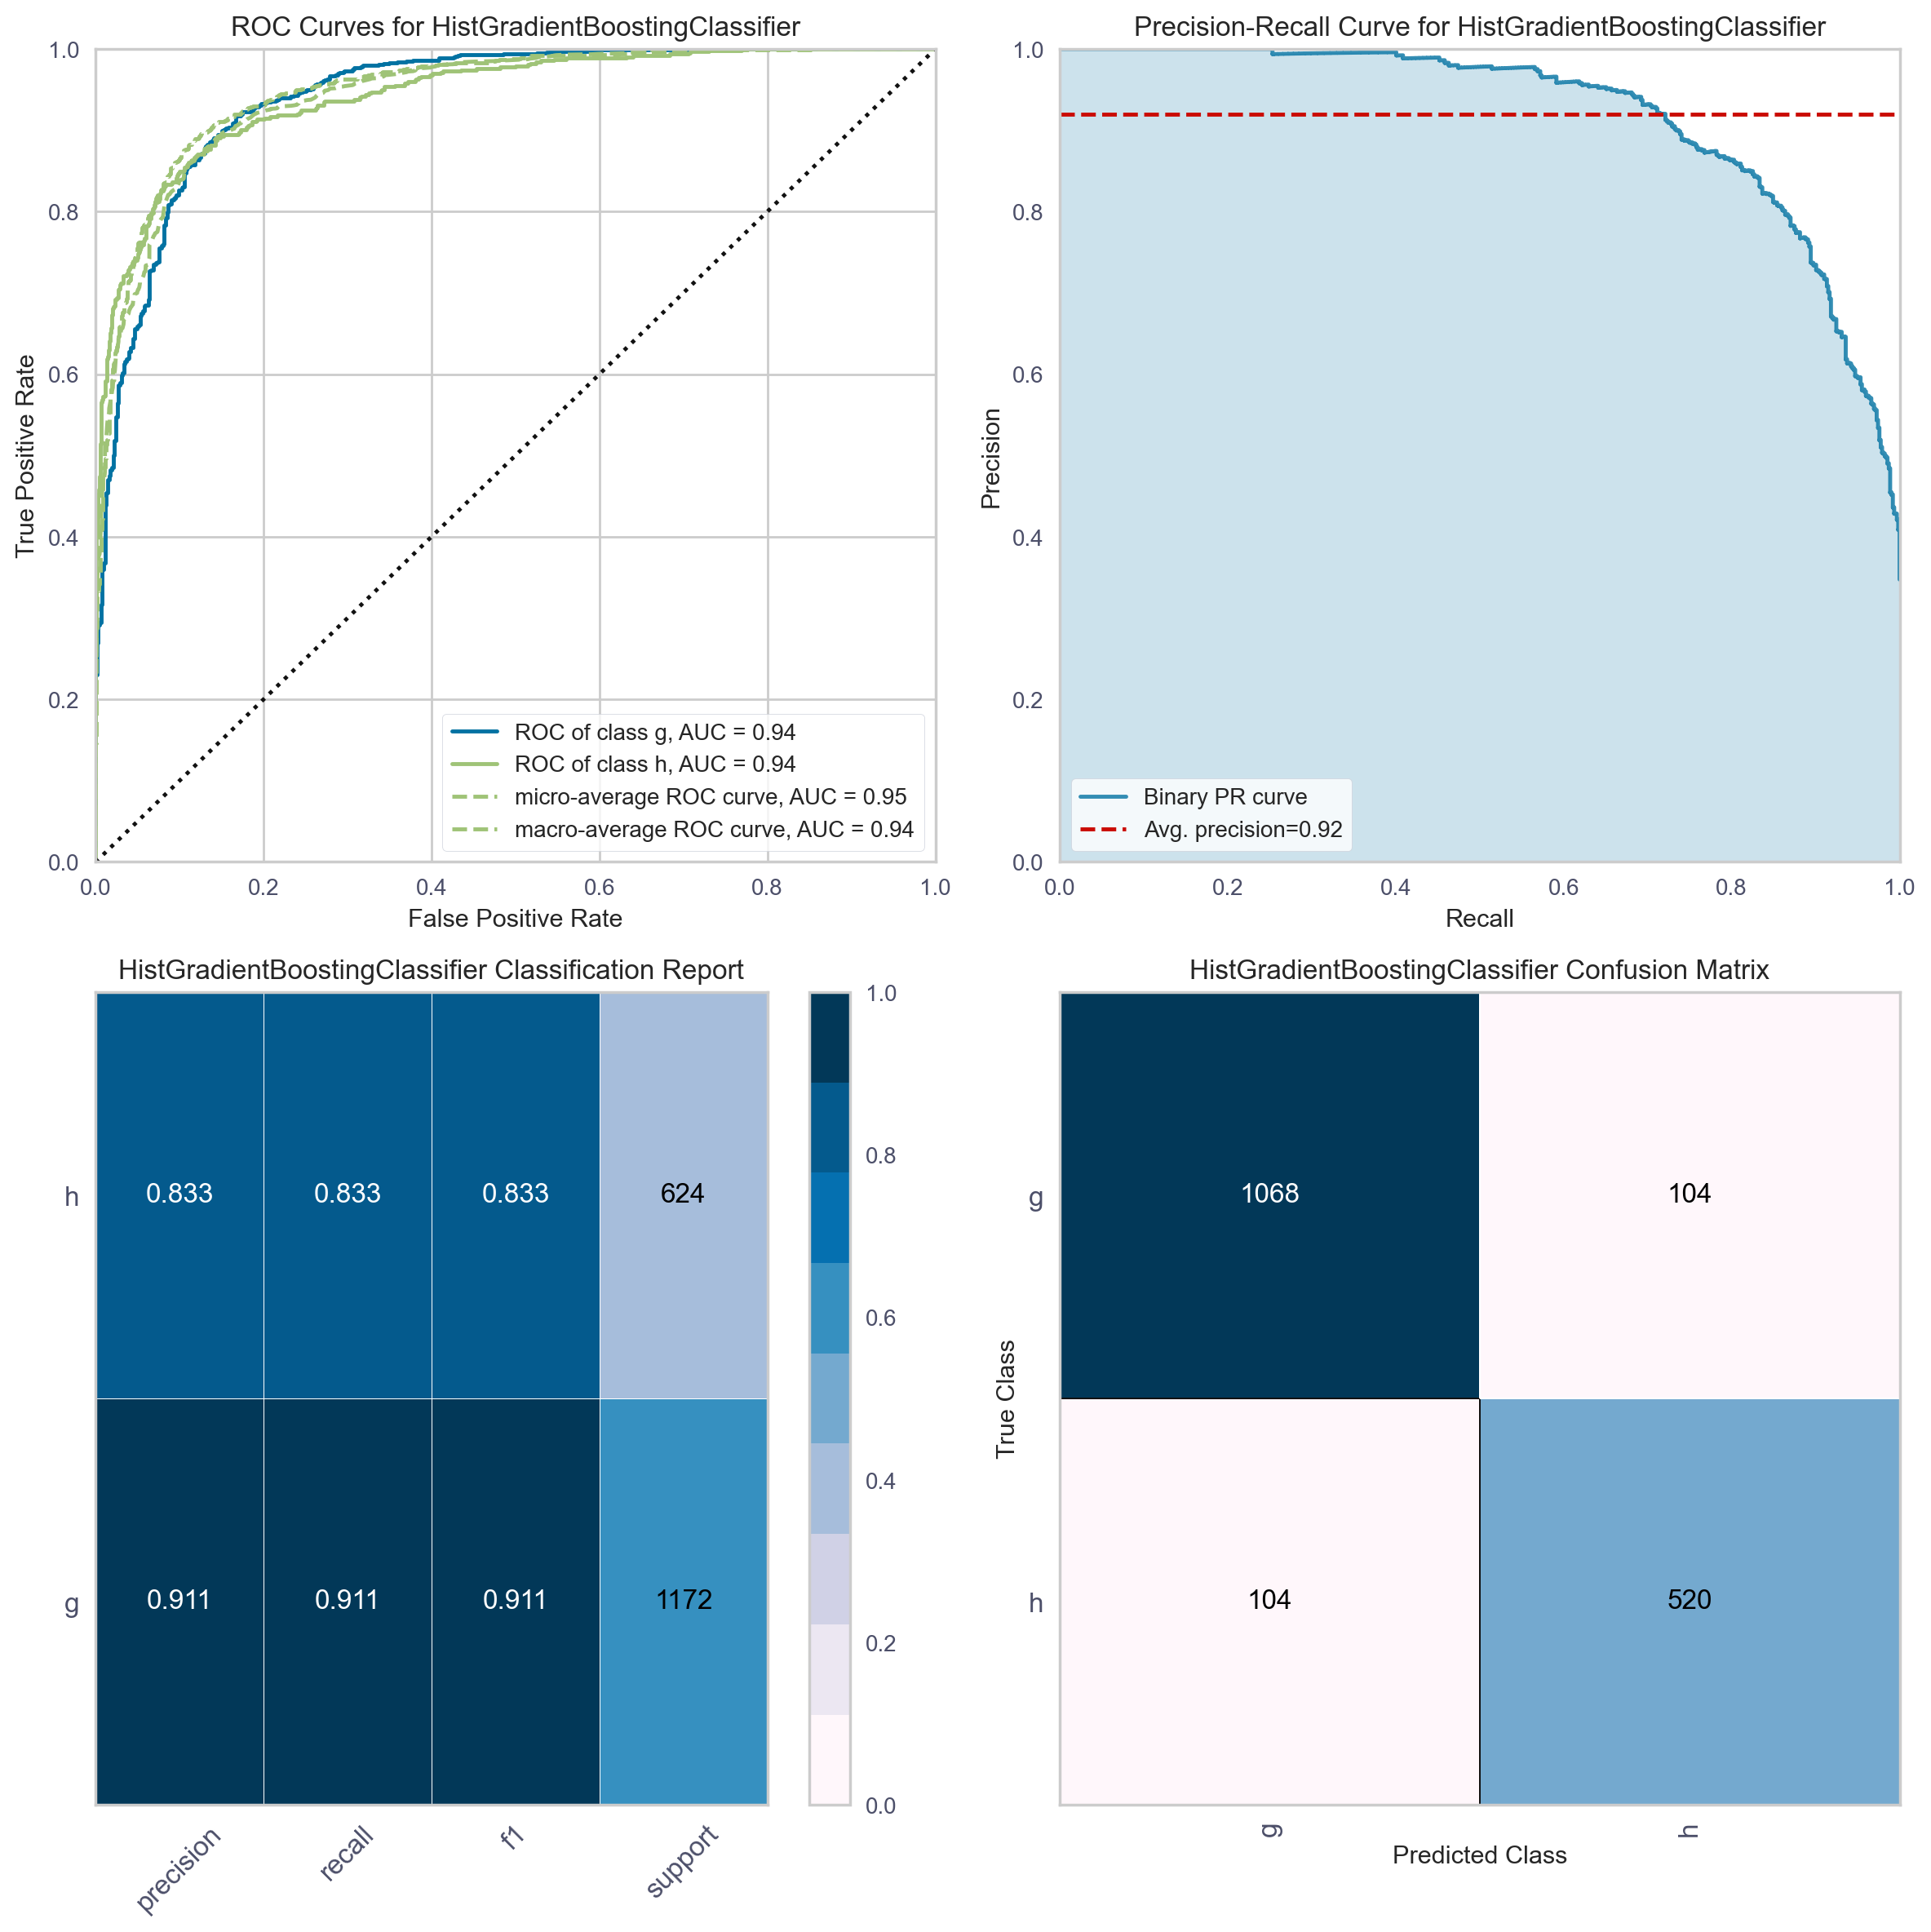

In [30]:
plot_classifier_reports(hgbc_clf)

/Users/alejandrodelgado/kaggle_2/new_env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8 ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


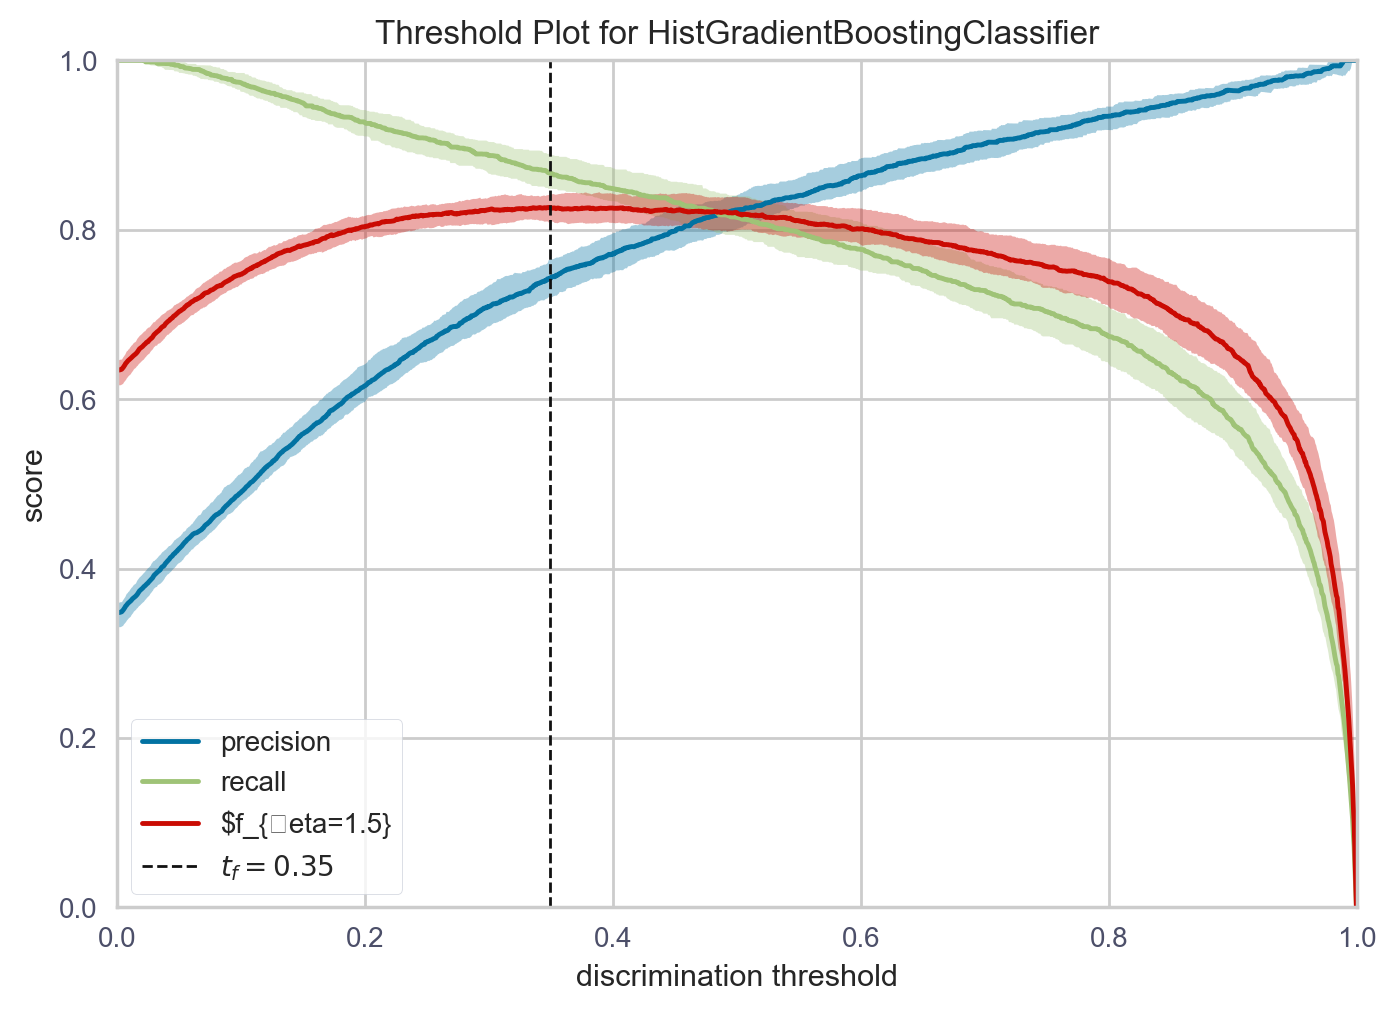

<Axes: title={'center': 'Threshold Plot for HistGradientBoostingClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [49]:
from yellowbrick.classifier import DiscriminationThreshold

vis_disc = DiscriminationThreshold(hgbc_clf, exclude='queue_rate', fbeta=1.5)

vis_disc.fit(X_train, y_train)
vis_disc.show()

In [32]:
def predict_w_threshold(model, threshold, X):
    return np.where(model.predict_proba(X)[:,1] < threshold, 0, 1)

In [50]:
X_val['preds'] = predict_w_threshold(hgbc_clf, 0.35, X_val)
X_val['class'] = y_val
X_val.head()

fLength   fWidth   fSize   fConc  fConc1    fAsym  fM3Long  fM3Trans   
5608  45.9832  21.4123  2.9325  0.2734  0.1408  -4.4598  40.5153   18.8747  \
2133  53.2086  22.5457  3.3736  0.2183  0.1212  -7.5763  24.0831  -14.1456   
7205  28.3417  13.9166  2.3655  0.3707  0.1875  -5.7750 -20.6703   -9.6614   
8579  39.0890  26.2530  3.2334  0.1969  0.1224   8.9864  19.5241   -2.9127   
4742  23.6595  16.5110  2.6425  0.3759  0.2062 -10.9314 -12.0225    5.2125   

       fAlpha    fDist  preds  class  
5608  15.1333  187.894      0      0  
2133  10.5073  245.071      0      0  
7205  78.0690  160.356      1      0  
8579  18.9796  164.936      0      0  
4742  24.2550  217.092      0      0

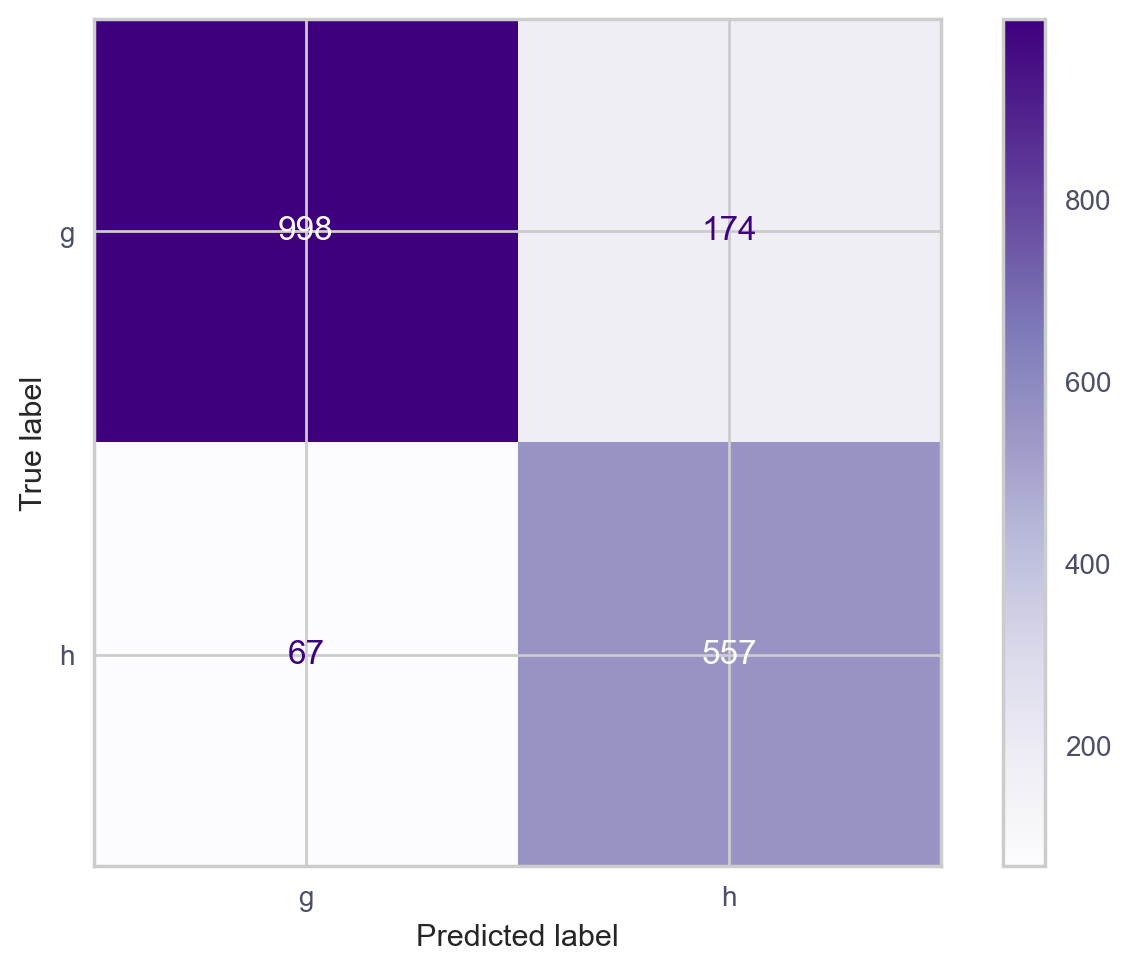

In [54]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(X_val['class'], X_val['preds'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['g', 'h'])
disp.plot(cmap='Purples')
plt.show()

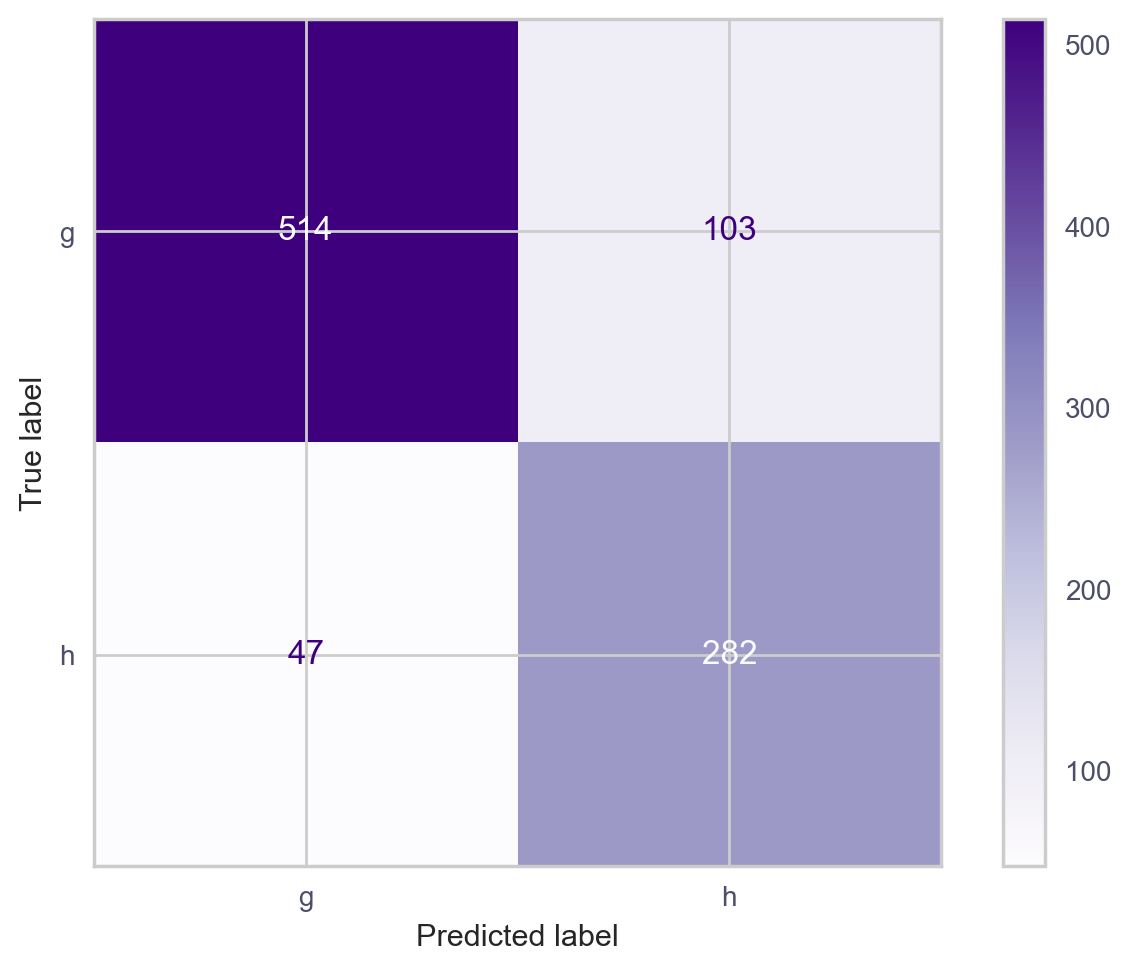

In [55]:
X_test['preds'] = predict_w_threshold(hgbc_clf, 0.35, X_test)
X_test['class'] = y_test

cm = confusion_matrix(X_test['class'], X_test['preds'], labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['g', 'h'])
disp.plot(cmap='Purples')
plt.show()